<a href="https://colab.research.google.com/github/mourackelyson/Data-Visualization-criando-gr-ficos-com-bibliotecas-Python/blob/main/Data_Visualization_criando_gr%C3%A1ficos_com_bibliotecas_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/imigrantes_canada.csv')

In [ ]:
df

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnã,Ásia,Sudeste Asiático,1191,1829,2162,3404,7583,5907,2741,...,1852,3153,2574,1784,2171,1942,1723,1731,2112,97146
191,Saara Ocidental,África,Norte da África,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,2
192,Iémen,Ásia,Ásia Ocidental,1,2,1,6,0,18,7,...,161,140,122,133,128,211,160,174,217,2985
193,Zâmbia,África,África Oriental,11,17,11,7,16,9,15,...,91,77,71,64,60,102,69,46,59,1677


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 38 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   País        195 non-null    object
 1   Continente  195 non-null    object
 2   Região      195 non-null    object
 3   1980        195 non-null    int64 
 4   1981        195 non-null    int64 
 5   1982        195 non-null    int64 
 6   1983        195 non-null    int64 
 7   1984        195 non-null    int64 
 8   1985        195 non-null    int64 
 9   1986        195 non-null    int64 
 10  1987        195 non-null    int64 
 11  1988        195 non-null    int64 
 12  1989        195 non-null    int64 
 13  1990        195 non-null    int64 
 14  1991        195 non-null    int64 
 15  1992        195 non-null    int64 
 16  1993        195 non-null    int64 
 17  1994        195 non-null    int64 
 18  1995        195 non-null    int64 
 19  1996        195 non-null    int64 
 20  1997      

##Realização de tratamentos

Para fazer isso, vamos alterar o index do nosso dataframe para ser o país. Assim, poderemos acessar só o Brasil e extrair informações desse país.

Na próxima célula de código, digitamos df.set_index() que é a função de mudar o índice. Entre parênteses e aspas, colocamos a coluna que queremos que seja o novo índice, País com a primeira letra em maiúscula.

O segundo parâmetro é o inplace igual à True. Desse modo, a alteração vai ser executada diretamente no dataframe df, sem a necessidade de criar um novo dataframe.

In [ ]:
df.set_index('País', inplace=True)

Após executar essa célula, vamos criar uma variável para armazenar o intervalo de tempo de 1980 até 2013. Isso irá facilitar muito na visualização dos dados.

Para isso, vamos criar a variável anos igual à lista com os intervalos de ano. Ou seja, usamos a função list() e, nela, colocamos a função map(), porque vamos pedir para que os valores fiquem em string. Desse modo, vamos ter os valores como objetos e não como números.

Dentro de map(), digitamos o primeiro parâmetro como str e o segundo parâmetro é o intervalo que queremos transformar em string, isto é, range(1980, 2014). Assim, começamos em 1980 que é o primeiro ano do dataframe e vamos até 2013, porque não consideramos o último valor.

In [ ]:
anos = list(map(str, range(1980, 2014)))

In [ ]:
anos

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

##Extração da série de dados para o Brasil

Agora, queremos pegar somente os dados do Brasil. Podemos usar a propriedade loc do Pandas para fazer isso, pois essa propriedade consegue pegar rótulos específicos dentro de um dataframe.

Em uma nova linha, criamos uma variável chamada brasil igual à df.loc[]. Entre colchetes, passamos o rótulo Brasil entre aspas. Além disso, queremos o intervalo dos anos de 1980 até 2013. Logo, também passamos a variável anos nos colchetes.

In [ ]:
brasil = df.loc['Brasil', anos]

In [ ]:
brasil

,Brasil
1980,211
1981,220
1982,192
1983,139
1984,145
1985,130
1986,205
1987,244
1988,394
1989,650


Temos uma series com os anos de 1980 a 2013 na primeira coluna e o número de imigrantes na segunda. Podemos transformar esses dados em um dataframe. Para fazer essa conversão, vamos criar um dicionário onde daremos um nome para cada uma das colunas: ano e número de imigrantes.

Criamos a variável brasil_dict que vai ser igual ao dicionário com o nome das colunas. Para isso, colocamos entre chaves, a chave ano entre aspas e o valor brasil.index.tolist(). Desse modo, atribuímos os dados da primeira coluna armazenada na variável Brasil, transformando a series em uma lista com a função tolist().

O título na próximo coluna é a chave imigrantes entre aspas. Como valor colocamos brasil.values.tolist().

Na linha de baixo, vamos efetivamente criar o dataframe chamado dados_brasil que vai ser igual à pd.DataFrame(). Entre os parênteses, adicionamos o dicionário brasil_dict.

In [ ]:
brasil_dict = {'ano': brasil.index.tolist(), 'imigrantes': brasil.values.tolist()}
dados_brasil = pd.DataFrame(brasil_dict)

In [ ]:
dados_brasil

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145
5,1985,130
6,1986,205
7,1987,244
8,1988,394
9,1989,650


In [ ]:
dados_brasil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ano         34 non-null     object
 1   imigrantes  34 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 672.0+ bytes


##Criação de gráfico com módulo pyplot

In [ ]:
import matplotlib.pyplot as plt


Com esse módulo, podemos criar gráficos de forma simples e prática. Para começar, vamos usar uma função chamada plot(). Desse modo, é gerado automaticamente um gráfico de linhas.

Um gráfico de linha é indicado para o tipo de dados que temos, porque queremos visualizar uma variável de acordo com o tempo.

Na próxima célula de código, vamos digitar plt.plot() e passar dois argumentos.

Como primeiro argumento, precisamos colocar os dados que estarão no eixo horizontal do gráfico. No nosso caso, os anos. Para isso, vamos digitar o dataframe dados_brasil e, entre colchetes e aspas, colocamos a coluna ano.

Como segundo argumento, precisamos colocar os dados para o eixo vertical do gráfico. Ou seja, novamente colocamos dataframe dados_brasil e, entre colchetes e aspas, a coluna imigrantes.

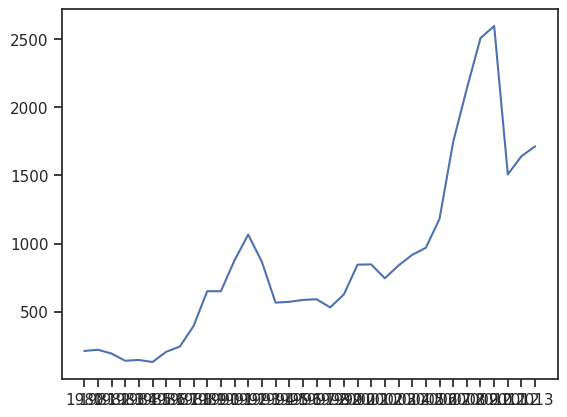

In [ ]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])

O eixo horizontal é a linha reta na parte inferior onde temos vários valores de anos que estão sobrepostos. Mais adiante, vamos falar dessa sobreposição. Na vertical, temos os dados numéricos com a quantidade de imigrantes.

O eixo horizontal também é conhecido como eixo x, enquanto o eixo vertical é o eixo y.

Sempre que falamos de "eixo", nos referimos a essa linha na qual os dados são dispostos. No nosso caso, temos no eixo x uma variável independente, o ano. No eixo y, temos uma variável dependente, porque varia de acordo com o ano. Por exemplo, temos valores crescentes e decrescentes no gráfico.

Contudo, não conseguimos visualizar facilmente os anos do eixo x, pois estão sobrepostos por causa da quantidade de dados.

##Melhora na visualização do gráfico
##Escolhendo quais anos aparecerem no eixo x com plt.xticks

Vamos digitar na segunda linha do código plt.plot() usada para criar o gráfico. Queremos chamar a função xticks() que se refere as marcações do eixo x.

Para isso, colocamos plt.xticks() e passamos uma lista contendo strings com os valores que queremos que apareçam no eixo x. Vamos colocar de 5 em 5 anos para deixar a visualização mais agradável. Entre colchetes e aspas, digitamos 1980, 1985, 1990, 1995, 2000, 2005 e 2010.

([<matplotlib.axis.XTick at 0x783223d4d3f0>,
 [Text(0.0, 0, '1980'),
  Text(5.0, 0, '1985'),
  Text(10.0, 0, '1990'),
  Text(15.0, 0, '1995'),
  Text(20.0, 0, '2000'),
  Text(25.0, 0, '2005'),
  Text(30.0, 0, '2010')])

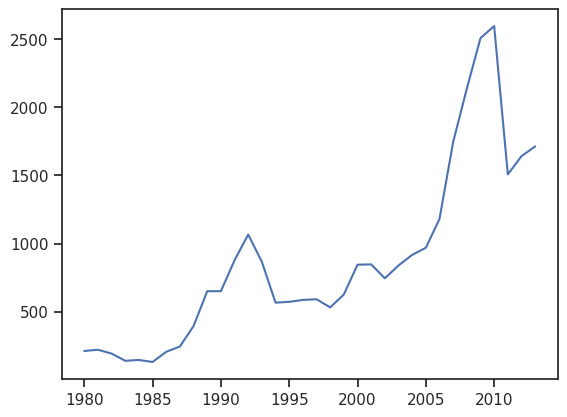

In [ ]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])

Além de adicionar os ticks no eixo x, também podemos alterar as marcações do eixo y. Para isso, vamos adicionar uma terceira linha no código de criação do gráfico.

Nessa linha, digitamos plt.yticks() para o eixo y. Entre os parênteses, adicionamos a lista os valores que queremos que apareçam no eixo vertical. Sem aspas, digitamos: 500, 1000, 1500, 2000, 2500 e um novo valor de 3000.

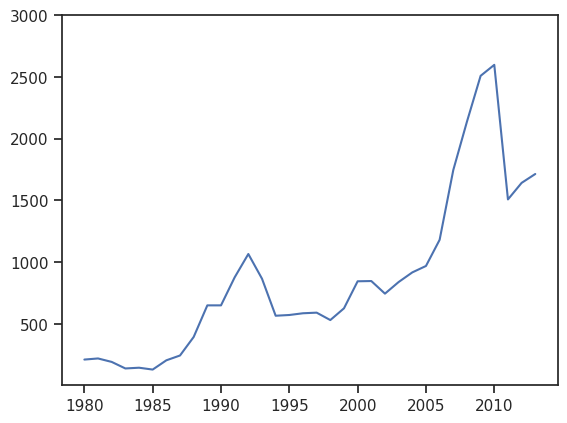

In [ ]:
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

##Modificando o tamanho do gráfico com a função plt.figure()

Além disso, podemos mudar o tamanho de um gráfico. O tamanho normal é um quadrado, mas podemos fazer alterações.

Para isso, vamos utilizar uma outra função chamada figure() que vamos colocar na primeira linha do código de criação do gráfico.

Damos um "Enter" para saltar uma linha e colocamos plt.figure(). Com essa função, conseguimos modificar o tamanho ao usar o parâmetro figsize igual a parênteses que contém os valores em polegada da largura e altura do gráfico. Nesse caso, vamos testar os valores (8, 4).

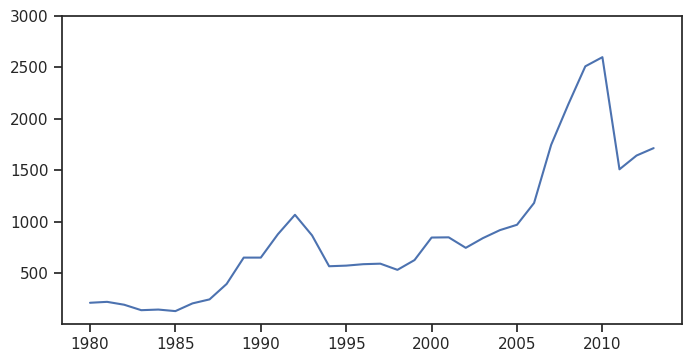

In [ ]:
plt.figure(figsize=(8,4))

plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.yticks([500, 1000, 1500, 2000, 2500, 3000])
plt.show()

##Adicionando título com plt.title()

Para colocar esse título, vamos acrescentar uma linha no código de criação do gráfico após plt.plot(). Vamos adicionar uma função com plt.title() e, com isso, conseguimos adicionar um título.

Entre parênteses e entre aspas, podemos escrever o que queremos que seja a descrição desse gráfico. No nosso caso, colocamos Imigração do Brasil para o Canadá. Em seguida, vamos executar essa célula.

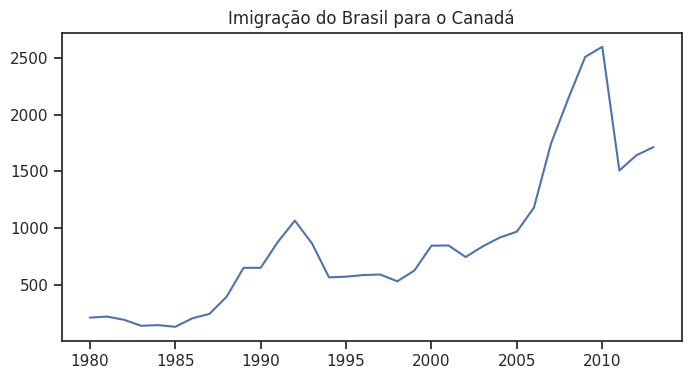

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

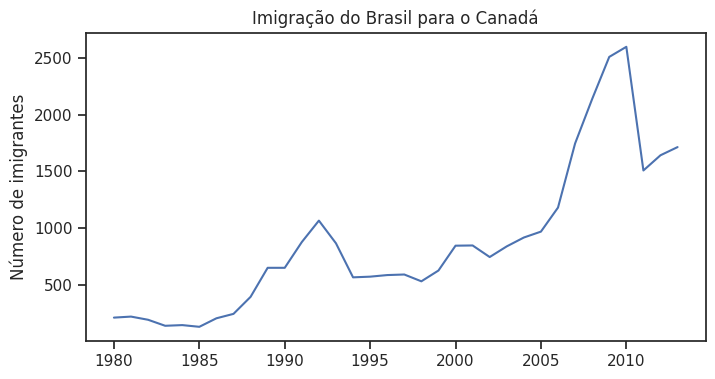

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.title('Imigração do Brasil para o Canadá')
plt.ylabel('Número de imigrantes')
plt.xticks(['1980', '1985', '1990', '1995', '2000', '2005', '2010'])
plt.show()

##AULA-2    Criando uma figura

Há uma função para fazer a criação de figuras chamada subplots(). Então em uma nova célula, vamos digitar plt.subplots().

Para criar a figura, vamos atribuir a função subplots a duas variáveis. Primeiro, colocaremos uma variável chamada fig, e depois a variável ax, separadas por vírgulas.

A variável fig permite a criação de uma figura, e quando falamos em figura, nos referimos a um espaço em branco. Já a variável ax representa o eixo ("ax" vem da abreviação da palavra axis em inglês). A partir disso, conseguiremos criar uma figura e também fazer algumas modificações nos eixos.

Dentro da função plt.subplots(), é possível modificar o tamanho da figura; fazemos isso com o parâmetro figsize, e passamos os valores de largura e altura em polegadas. Vamos definir novamente os valores 8 e 4, já usados anteriormente.

Agora, como nós temos o eixo definido na variável ax, vamos colocar o ax na linha de código abaixo e usar a função plot() em cima desse eixo. Para isso, digitamos ax.plot(). Entre os parênteses da função, vamos passar os dados do eixo x e do eixo y, conforme fizemos anteriormente. São eles, respectivamente:

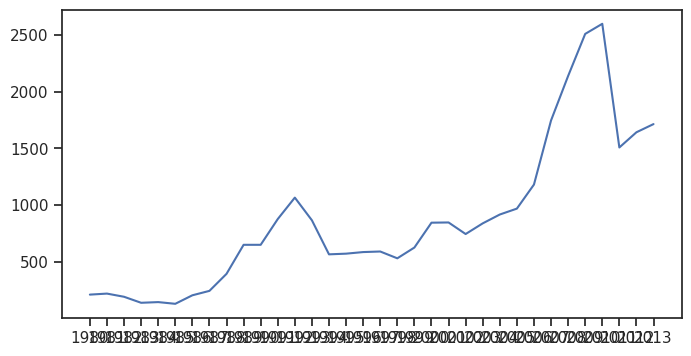

In [ ]:
fig, ax =plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
plt.show()

Agora nós temos uma figura e, a partir dela, podemos fazer algumas modificações e utilizar outras funções que não conseguíamos usar antes.

A primeira coisa que vamos resolver no gráfico acima é o eixo x. Nós já fizemos isso anteriormente, mas agora que temos uma figura, o processo será um pouco diferente e até mais simples.

Na terceira linha do código, acima da função plt.show(), nós vamos adicionar uma nova informação. Começaremos com a variável ax, para modificar eixos, seguida de xaxis, indicando que vamos modificar o eixo x.

Logo em seguida, vamos adicionar a função set_major_locator(). Com essa função, conseguimos modificar o eixo x. Se quisermos, por exemplo, o intervalo de 5 em 5 anos, podemos passar entre parênteses plt.MultipleLocator(5), para que a frequência dos ticks do eixo x seja 5.

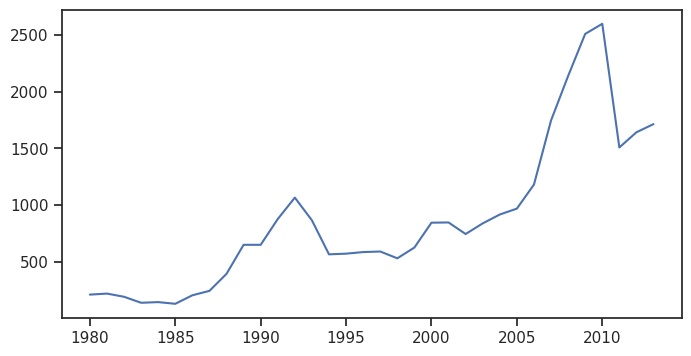

In [ ]:
fig, ax =plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

##Adicionando um título à figura

No código criado anteriormente, vamos adicionar um título na terceira linha de código, abaixo da função ax.plot(). Agora o processo será um pouco diferente de quando fizemos a plotagem.

Quando temos uma figura, usamos a função ax.set_title(). Entre parênteses e entre aspas simples, podemos adicionar o título desejado, que será "Imigração do Brasil para o Canadá" inicialmente.

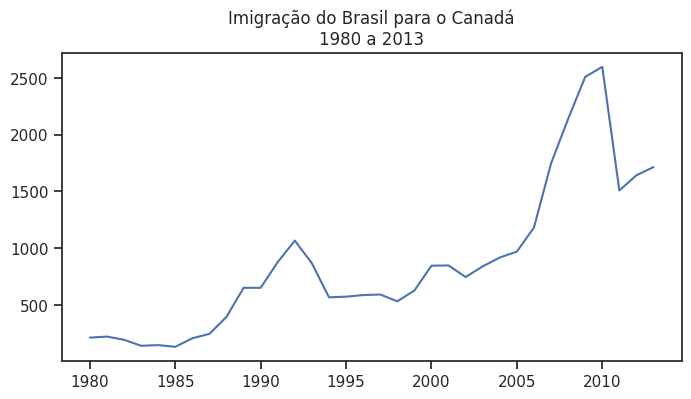

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

##Adicionando rótulos à figura

Para adicionar rótulos em uma figura, vamos escrever a função ax.set_xlabel() na quarta linha de código (após a função ax.set_title()), correspondente ao rótulo do eixo x. Entre parênteses, colocaremos o rótulo "Ano" entre aspas simples.

Na próxima linha de código, teremos o rótulo do eixo y, então digitamos a função ax.set_ylabel(). Entre parênteses e aspas simples, vamos digitar o rótulo "Número de imigrantes".

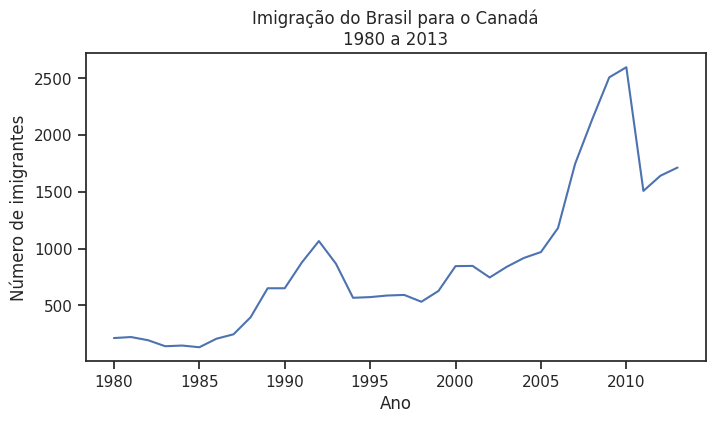

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

##Criando subplots em uma direção

Primeiro, vamos criar uma figura com a função subplots(). Para isso, usaremos a variável fig seguida da variável axs (referente aos eixos), separadas por uma vírgula.

Como agora teremos mais de um gráfico, precisamos especificar os eixos com axs.

Após o sinal de igual (=), vamos adicionar a função plt.subplots(). Essa função nos permite dizer quantos subplots(), isto é, quantos gráficos queremos na mesma figura. Então, ela receberá dois argumentos:

A quantidade de linhas de subplots(), ou seja, de novos gráficos;
E o tamanho da figura.
Nesse caso, como queremos comparar apenas dois gráficos lado a lado, precisamos somente de uma linha, então vamos digitar 1, 2 entre os parênteses da função.

Para definir o tamanho, usamos o parâmetro figsize, que será igual a 15, 5, indicado entre parênteses. Lembrando que o primeiro número é referente à largura e o segundo referente à altura.

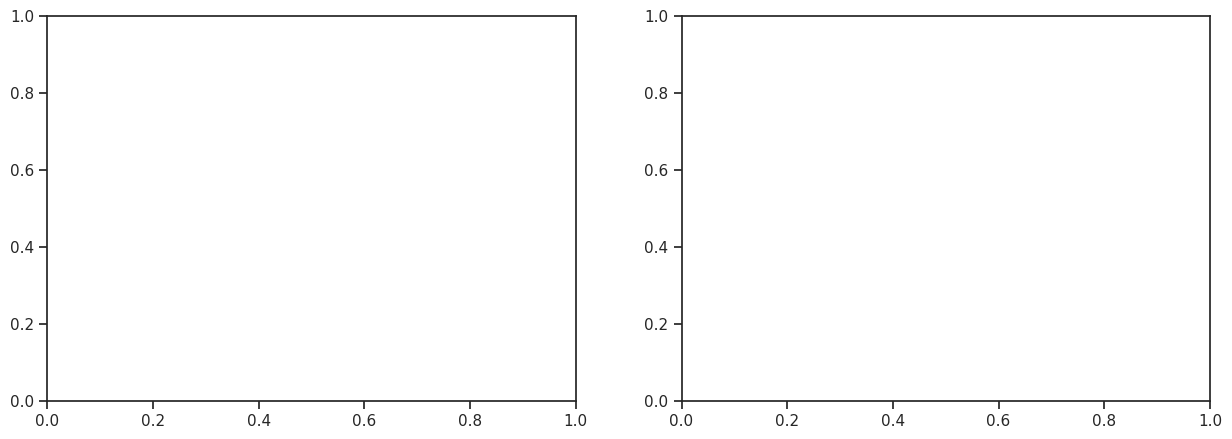

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

Agora vamos criar dois subplots na mesma célula. O primeiro será um gráfico de linhas (que já vimos anteriormente) e o segundo gráfico será um boxplot. Para criar dois gráficos diferentes nessa figura, precisamos especificar a posição de cada um deles.

O primeiro gráfico se chamará axs e vamos colocar entre colchetes o valor 0.

A indexação em Python sempre começa por 0.

Em seguida, vamos plotar o nosso gráfico com a função plot(). Entre parênteses, passaremos o objeto dados_brasil e adicionaremos a variável ano entre colchetes e aspas simples. Esse será o nosso eixo x.

Para o eixo y, vamos digitar dados_brasil novamente, porém recebendo a variável imigrantes.

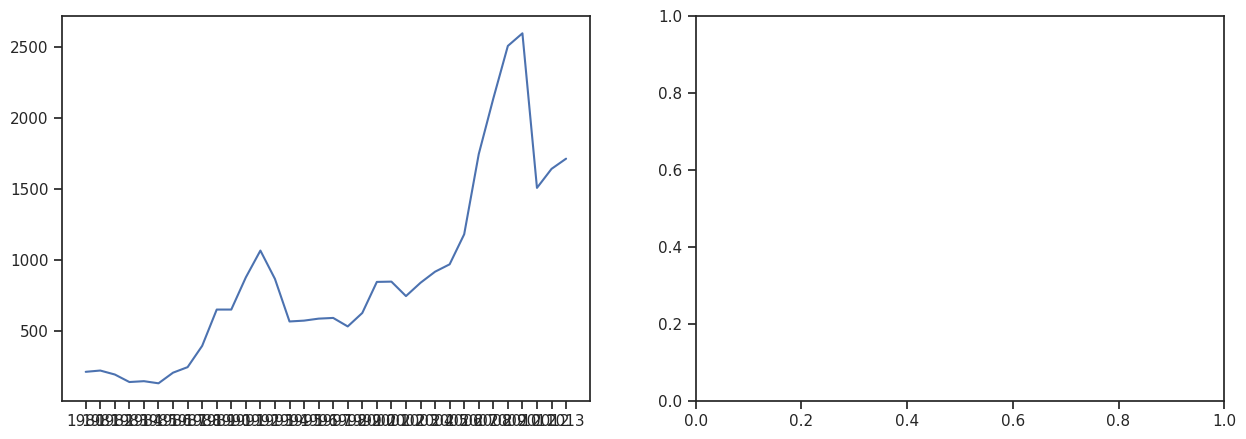

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])

Nesse momento, já podemos adicionar o título e os rótulos do gráfico. Novamente, vamos adicionar axs[0], porém seguido da função set_title(). Entre parênteses e aspas simples, colocaremos o título Imigração do Brasil para o Canadá\n1980 a 2013.

Em seguida, vamos definir os rótulos dos eixos. Após adicionar axs[0] na linha de código abaixo, digitamos a função set_xlabel contendo o rótulo Ano. Logo abaixo, digitamos novamente axs[0], contendo agora a função set_ylabel recebendo o rótulo Número de imigrantes.

Por fim, precisamos adicionar a configuração do eixo x, para evitar que os anos fiquem sobrepostos no gráfico. Então, na última linha de código, vamos adicionar a função xaxis.set_major_locator(). Passaremos entre parênteses plt.MultipleLocator(5) para definir a frequência como a cada 5 anos.

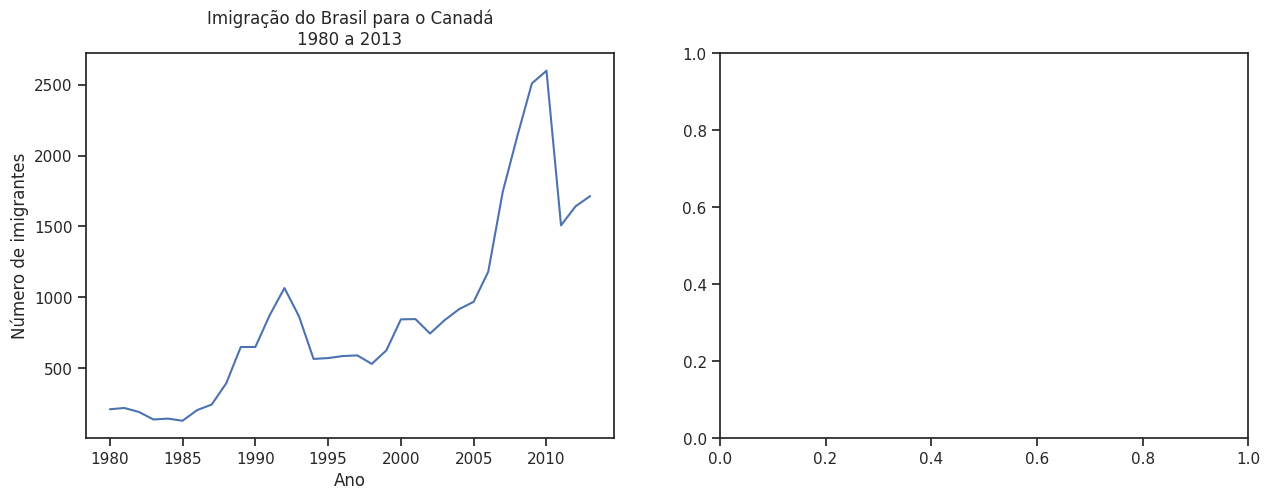

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))

Para criar o segundo gráfico, faremos basicamente o mesmo processo, porém alterando o axs[0] por axs[1], indicando que são as informações do segundo gráfico.

Agora faremos um boxplot, então vamos adicionar a função boxplot() após o primeiro axs[1]. Quando criamos um gráfico desse tipo, precisamos passar apenas os dados numéricos, isto é, o eixo y. Então, vamos trazer novamente o objeto dados_brasil e passar a variável imigrantes entre colchetes e aspas simples.

O processo para adicionar título e rótulos é o mesmo, porém vamos usar as seguintes informações:

Título: Boxplot da imigração do Brasil para o Canadá\n1980 a 2013
Rótulo do eixo x: Brasil
Rótulo do eixo y: Número de imigrantes
Por fim, vamos utilizar a função plt.show() para exibir os gráficos.

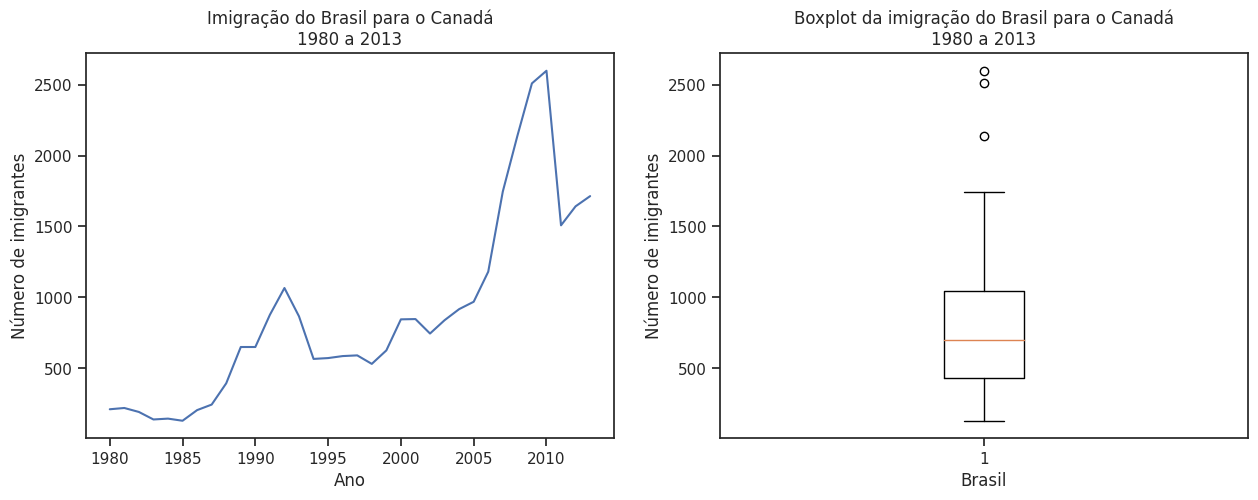

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')

plt.show()

Para facilitar a visualização e identificação dos valores no boxplot, podemos adicionar grades aos gráficos. Para isso, acrescentamos o seguinte comando ao final de cada gráfico, respectivamente:

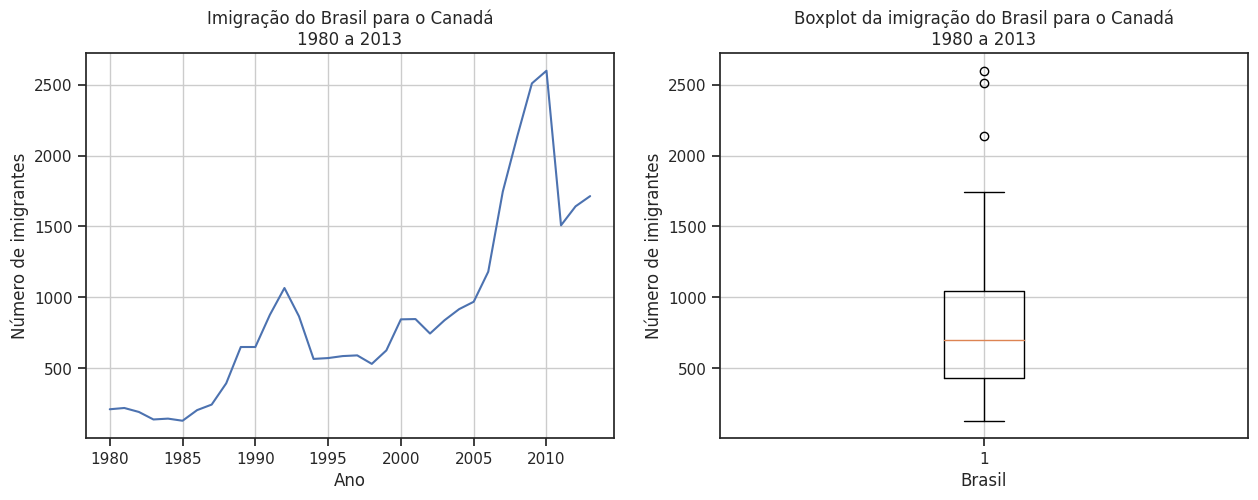

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

axs[0].plot(dados_brasil['ano'], dados_brasil['imigrantes'])
axs[0].set_title('Imigração do Brasil para o Canadá\n1980 a 2013')
axs[0].set_xlabel('Ano')
axs[0].set_ylabel('Número de imigrantes')
axs[0].xaxis.set_major_locator(plt.MultipleLocator(5))
axs[0].grid()

axs[1].boxplot(dados_brasil['imigrantes'])
axs[1].set_title('Boxplot da imigração do Brasil para o Canadá\n1980 a 2013')
axs[1].set_xlabel('Brasil')
axs[1].set_ylabel('Número de imigrantes')
axs[1].grid()

plt.show()

In [ ]:
dados_brasil.describe()

,imigrantes
count,34.000000
mean,872.323529
std,663.401232
min,130.000000
25%,428.250000
50%,697.500000
75%,1041.750000
max,2598.000000


##Criando subplots em duas direções

Podemos começar analisando os 4 maiores países da América do Sul: Brasil, Colômbia, Argentina e Peru. Nosso objetivo é comparar as tendências em uma única figura, utilizando subplots.

No vídeo anterior, fizemos uma figura com 2 subplots, mas agora teremos uma figura com 4. Como podemos fazer isso? Será que as tendências de imigração foram diferentes para cada um dos países? Descobriremos isso em breve!

Criando a figura
Para criar a figura, vamos digitar a variável fig em uma nova célula, seguida de axs, separadas por uma vírgula. Essas variáveis serão iguais à função plt.subplots(). Entre parênteses, passaremos quantos subplots teremos na figura. Nesse caso, queremos 2 subplots em uma primeira linha, e outros 2 subplots em uma segunda linha. Então, digitamos 2,2.

Além disso, vamos definir o tamanho da figura. Para isso, usamos o parâmetro figsize, que será igual aos valores 10,6, indicados entre parênteses após o sinal de =.

Na próxima linha de código, começaremos a criar os subplots para cada um dos países. Começaremos pelo Brasil. Para definir cada subplot e qual será a posição deles, começamos com a variável axs e abrimos colchetes. Nosso primeiro subplot terá a posição [0,0], isto é, a primeira posição na figura.

Logo em seguida, adicionamos a função plot() para plotar a informação.

Para facilitar o processo e evitar a criação de DataFrames para cada país, vamos retornar ao DataFrame original, então entre os parênteses da função, digitaremos df. Nesse momento, usaremos o método loc, utilizado anteriormente para extrair apenas a série de dados do Brasil, e agora para cada um dos países.

Como o primeiro gráfico é referente ao Brasil, passaremos Brasil entre colchetes e aspas simples após o método loc. Além disso, vamos adicionar a variável anos ao método.

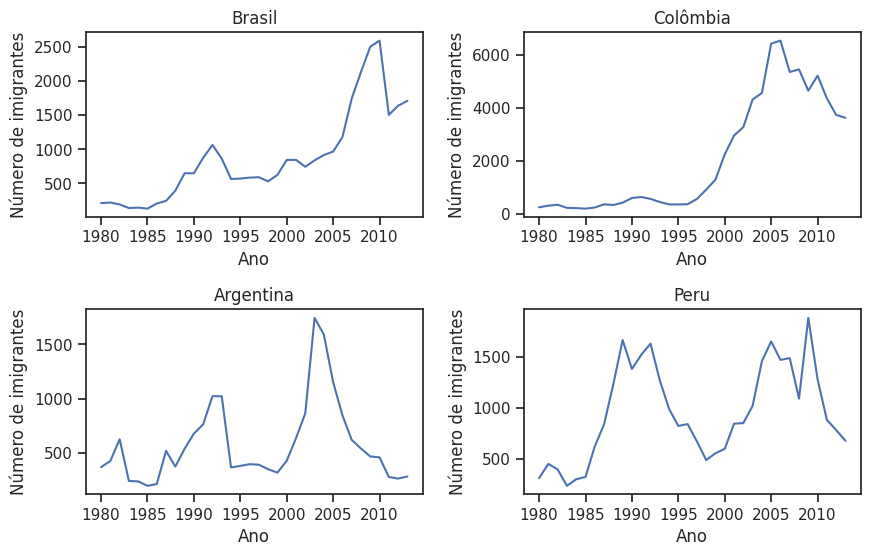

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

  for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

plt.show()

Outro ponto importante é ajustar os valores do eixo x, de modo que seja possível ler e entender os dados do gráfico. Então, vamos usar novamente a frequência a cada 5 anos.

Para aplicar isso a todos os subplots, podemos usar a instrução for. Ao final do código, antes da função plt.show(), vamos adicionar um novo bloco contendo a instrução for, seguida de ax (representando o eixo) e da estrutura in axs, indicando que serão considerados todos os subplots. Após a variável axs, vamos adicionar o atributo flat seguido de dois-pontos; ele fará um loop que irá percorrer todos os subplots da matriz.

Na linha de código abaixo, vamos adicionar ax.xaxis (para modificar o eixo x) seguido da função set_major_locator(). Entre parênteses, colocaremos plt.MultipleLocator(5), para definir a frequência como 5.


Nesse momento, podemos adicionar os rótulos dos eixos x e y de cada gráfico, usando novamente a instrução for. Dessa forma, conseguimos definir os rótulos para todos os gráficos simultaneamente, em vez de fazer isso para cada subplot individualmente.

Antes da função plt.show(), colocaremos um novo bloco com a instrução for, seguida novamente de ax in axs.flat:.

Na próxima linha de código, vamos adicionar a função ax.set_xlabel() (eixo x), passando para ela o Ano entre aspas simples. Na linha seguinte, teremos a função ax.set_ylabel() (eixo y), recebendo entre parênteses e aspas simples o Número de imigrantes.

\

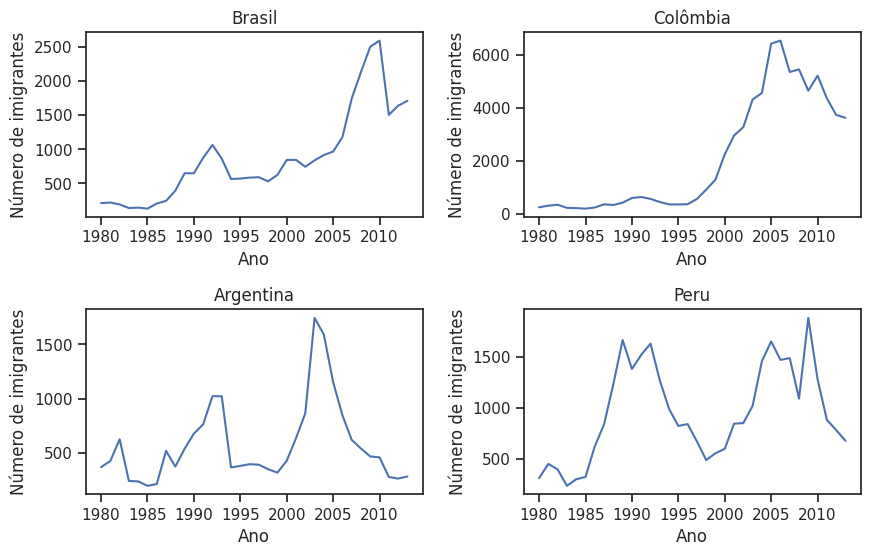

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

  for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

plt.show()

##Criando subplots em duas direções

Perguntamos anteriormente se as tendências de imigração eram as mesmas para todos os países. Analisando os gráficos, conseguimos entender que não.

Por exemplo, no Brasil, temos dois picos maiores: o primeiro entre 1990 e 1995, e depois um grande pico entre 2005 e 2010. Já na Colômbia, não há picos no começo, mas há um grande aumento a partir do final dos anos 90. Então, depois de 1995, temos um aumento bem grande, que aconteceu antes do Brasil. Outro ponto de atenção é que o número de imigrantes máximo no Brasil está em 2.500, enquanto na Colômbia está em 6.000 imigrantes. Temos uma expressividade bem maior na Colômbia.

Já na Argentina, temos dois picos maiores: um entre 1990 e 1995, como no Brasil, e o segundo pico acontecendo também um pouco antes do Brasil, começando nos anos 2000. No Peru, temos dois picos, um começando em 1985 e terminando no final dos anos 90, e outro começando também nos anos 2000, com um maior valor em cerca de 2010.

Precisamos fazer um destaque importante: esses gráficos estão em escalas diferentes de eixo y. No gráfico do Brasil, o valor vai até 2500; nos da Argentina e do Peru, até 1500; e no da Colômbia, até 6000. Isso pode gerar uma confusão para quem visualiza o gráfico.

Se o gráfico for publicado ou apresentado em algum meio, podemos passar a impressão de que ele está distorcido, pois visualmente, podemos interpretar que os números do Brasil e da Colômbia são praticamente os mesmos no valor máximo. Porém, os valores são diferentes nos eixos.

##Ajustando o eixo y dos gráficos

Podemos consertar esses valores do eixo y, deixando todos os gráficos com o mesmo valor mínimo e o mesmo valor máximo. Para fazer isso, criaremos mais uma instrução for.

Antes da função plt.show(), adicionaremos o valor mínimo do eixo y, então vamos definir o parâmetro ymin sendo igual a 0. Em seguida, vamos adicionar o valor máximo, então ymax. Nesse caso, o valor pode ser em torno de 7000, por exemplo.

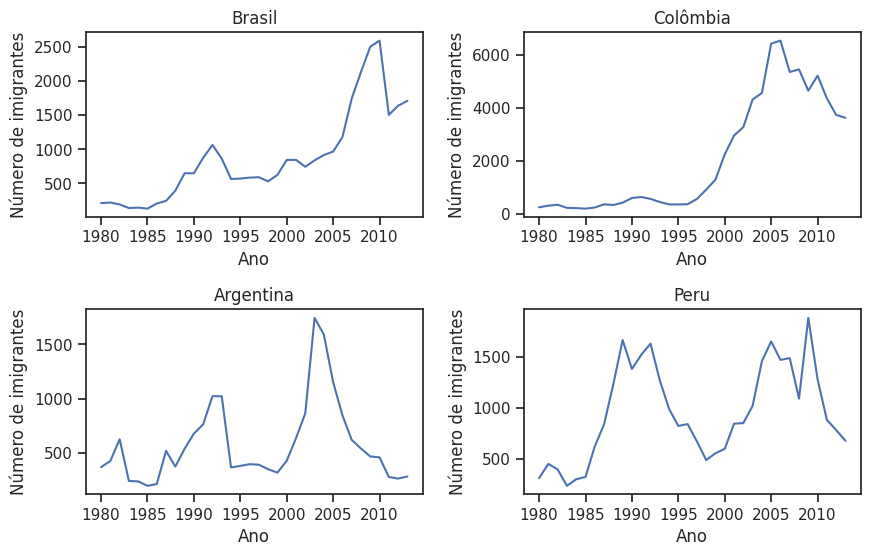

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

  for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')

ymin = 0
ymax = 7000


plt.show()

Agora vamos incluir a instrução for para ajustar os valores. Após a estrutura for ax in axs, vamos adicionar o método ravel(), que consegue transformar um array bidimensional em unidimensional e fazer algumas aplicações. Finalizaremos o método com dois-pontos. Com isso, vamos conseguir iterar sobre todos os objetos.

Na linha de código abaixo, vamos adicionar a função ax_set_ylim(), referente ao limite. Entre os parênteses da função, passaremos as variáveis ymin e ymax, que serão os limites do eixo y.

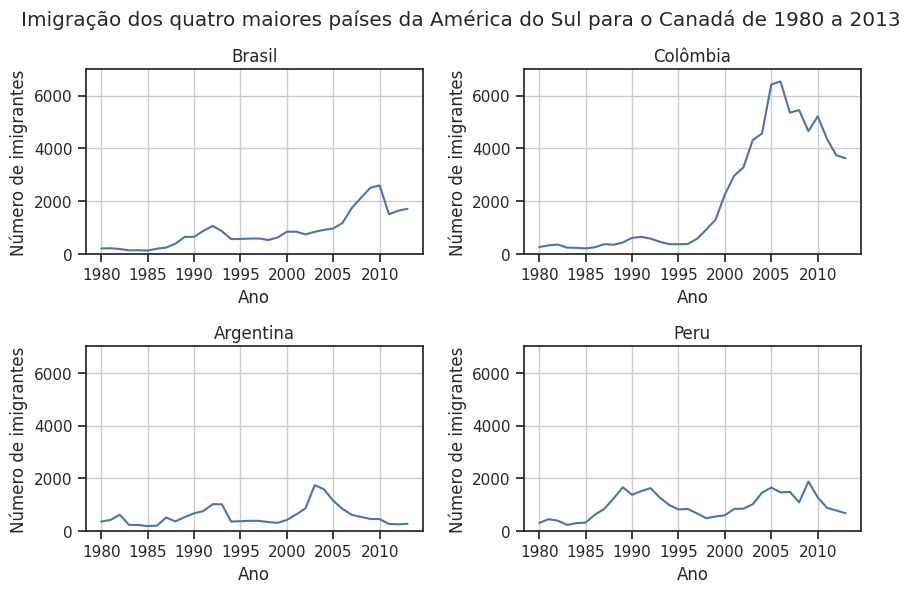

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10,6))
fig.subplots_adjust(hspace=0.5, wspace=0.3)
fig.suptitle('Imigração dos quatro maiores países da América do Sul para o Canadá de 1980 a 2013')

axs[0,0].plot(df.loc['Brasil', anos])
axs[0,0].set_title('Brasil')

axs[0,1].plot(df.loc['Colômbia', anos])
axs[0,1].set_title('Colômbia')

axs[1,0].plot(df.loc['Argentina', anos])
axs[1,0].set_title('Argentina')

axs[1,1].plot(df.loc['Peru', anos])
axs[1,1].set_title('Peru')

for ax in axs.flat:
  ax.xaxis.set_major_locator(plt.MultipleLocator(5))

  for ax in axs.flat:
    ax.set_xlabel('Ano')
    ax.set_ylabel('Número de imigrantes')
    ax.grid(True)


ymin = 0
ymax = 7000

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)


plt.show()

##Customizando com Matplotlib

-Já aprendemos a plotar gráficos, criar figuras e até a adicionar subplots em uma figura. Agora aprenderemos como customizar ainda mais o nosso gráfico, modificando o tamanho de fontes, mudando as cores, adicionando mais informações.

Para isso, começaremos mudando o gráfico onde tínhamos apenas os dados do Brasil. Estou com o código dessa figura aberto e faremos algumas modificações para melhorar a visualização.

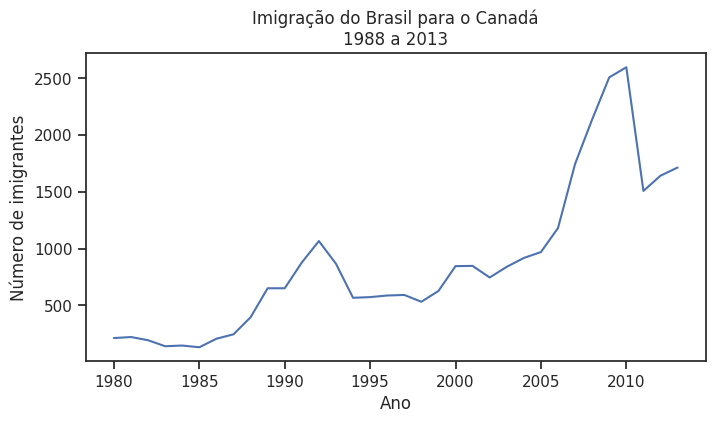

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013')
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

Nossa primeira mudança será o tamanho da fonte do título, que costumam ter um tamanho maior. Também modificaremos o tamanho da fonte dos dados numéricos dos eixos X e Y, mas começaremos pelo título.

Para modificarmos o tamanho do título, mudaremos a terceira linha do código, onde temos o ax.set_title(). Depois do fechamento de aspas simples do título, escreveremos uma vírgula e usaremos o parâmetro fontsize, com o qual conseguimos alterar o tamanho da fonte. Testaremos o valor 18, escrevendo fontsize=18.

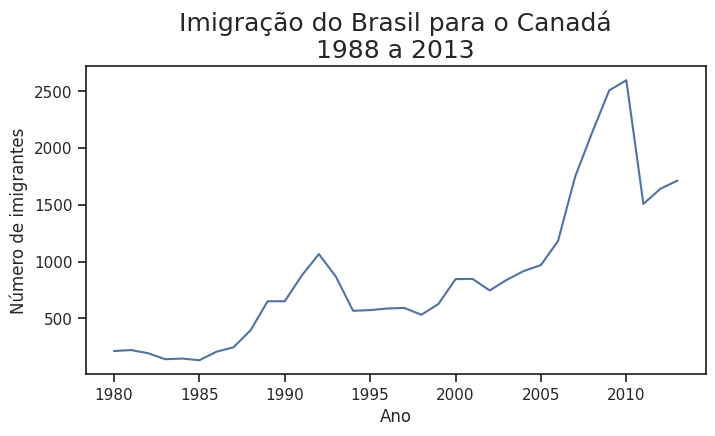

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18)
ax.set_xlabel('Ano')
ax.set_ylabel('Número de imigrantes')
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

Executando a célula, o retorno é o gráfico anterior com o título bem evidente, facilitando a visualização dele no nosso gráfico. Também podemos alterar a fonte dos rótulos (labels) do eixo X e Y, sucessivamente "Ano" e "Número de imigrantes". Para isso, mudaremos as linhas do ax.set_xlabel() e ax.set_ylabel(), adicionando o fontsize=14 depois do nome do rótulo.

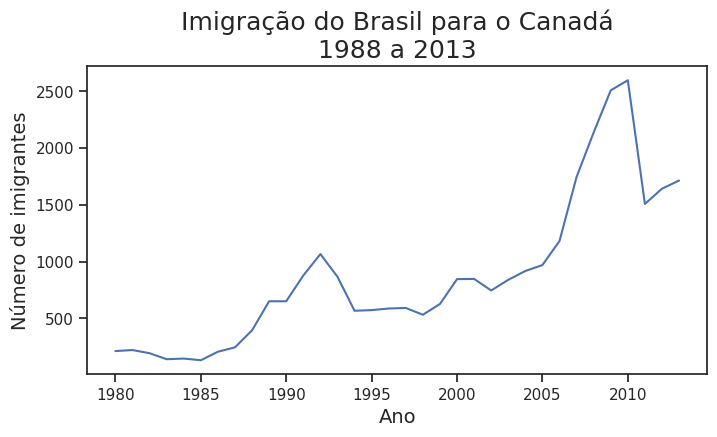

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

Ao executarmos o código novamente, o tamanho dos rótulos aumentou também, facilitando a leitura. Nosso próximo passo é aumentar a fonte dos valores (ticks) do eixo X e do eixo Y.

Essa etapa é um pouco diferente. Para ela, após o fechamento de parênteses da linha ax.set_ylabel(), pressionaremos "Enter", e escreveremos novas informações na linha antes do ax.xaxis.set_major_locator().

Começaremos codando ax.xaxis para nos referirmos especificamente ao eixo X, e adicionaremos a função .set_tick_params(), nos referindo aos parâmetros dos ticks. Entre os parênteses, escreveremos labelsize para definir o tamanho desse valor.

Como atribuímos "14" para o rótulo, definiremos como "12" para ficar um pouco menor. Sendo assim, o código fica ax.xaxis.set_tick_params(labelsize=12). Pressionaremos "Enter" ao final da linha e seguiremos o mesmo processo para os valores do eixo Y, escrevendo ax.yaxis.set_tick_params(labelsize=12).

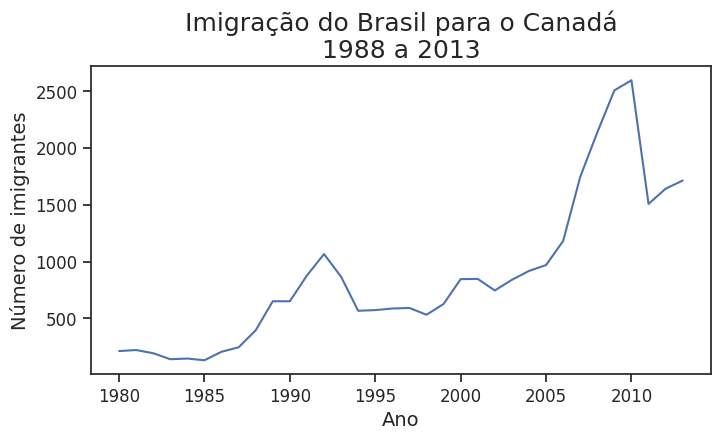

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'])
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18)
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.show()

Ao executarmos o código, pressionando "Shift + Enter", percebemos que as
informações escritas estão mais evidentes, facilitando a leitura do gráfico. Porém, existem mais mudanças que podemos fazer para melhorar a visualização. Uma dessas mudanças é na posição do título do gráfico.

No nosso caso, a posição está centralizada, mas a leitura das pessoas costuma acontecer da seguinte forma: em uma página, ela começa do canto superior esquerdo e percorre o olhar em zigue-zague pela página. Então ela lê da esquerda para direita e volta para o começo da linha abaixo, à esquerda, repetindo esse movimento até chegar ao canto inferior direito da página.

Sendo assim, o ideal é colocarmos o título alinhado à esquerda, porque com isso a pessoa consegue ler o título e acompanhar o gráfico. Essa não é uma regra, apenas uma dica para melhorar a visualização.

Para mudarmos a posição do título, voltaremos para terceira linha de código, onde temos o ax.set_title(). Dentro dos parênteses, após o fontsize=18, escreveremos uma vírgula e o parâmetro loc='left', para determinar a localização do título à esquerda.




Executando o código, o gráfico recarrega e o título está alinhado à esquerda, algo que percebemos facilmente, porque temos duas linhas de título. Outro aspecto que podemos alterar é a espessura da linha do gráfico, que está bem fina.

Para alterarmos a espessura de uma linha, voltamos ao código e alteraremos a linha do ax.plot(). Dentro dos parâmetros temos os dados do eixo X e do Y e, depois de dados_brasil['imigrantes'], escreveremos uma vírgula seguida do parâmetro lw=3, para definirmos a espessura da linha como 3 pixels. Vamos testar se esse tamanho fica agradável.

Ao executarmos o código, pressionando "Shift + Enter", percebemos que a linha está mais grossa e, portanto, mais evidente. Com isso, o gráfico ficou mais interessante e fácil de entender.

Além disso, precisamos adicionar marcadores na linha, indicando a posição em que os dados estão. Por exemplo, se temos um dado sobre 1980, a linha teria um marcador nessa posição, e assim por diante.

Para isso, voltaremos à linha do ax.plot() e, depois do lw=3, escreveremos uma vírgula e o parâmetro marker. Com esse parâmetro, podemos definir o tipo de marcador que nós queremos: círculo, triângulo, quadrado, entre outras formas. Testaremos com o círculo, codando marker='o'.

Ao executarmos o código novamente, percebemos que aparecem vários círculos sobre a linha do gráfico, ou seja, temos marcadores em todos os pontos onde temos dados. A adição de marcadores pode ser interessante em alguns casos, mas em outros não.

No nosso caso, temos vários pontos, gerando muita informação, o que sobrecarrega nossa visualização. Sendo assim, não é tão interessante adicionar marcadores para esse gráfico.

Outra coisa que podemos adicionar ao gráfico, e que testamos anteriormente, é adicionar uma grade (grid) no fundo do gráfico. Então removeremos o marker='o' do ax.plot(). Em seguida, ao final da penúltima linha do código, antes do plt.show(), pressionaremos "Enter". Na nova linha, escreveremos plt.grid().

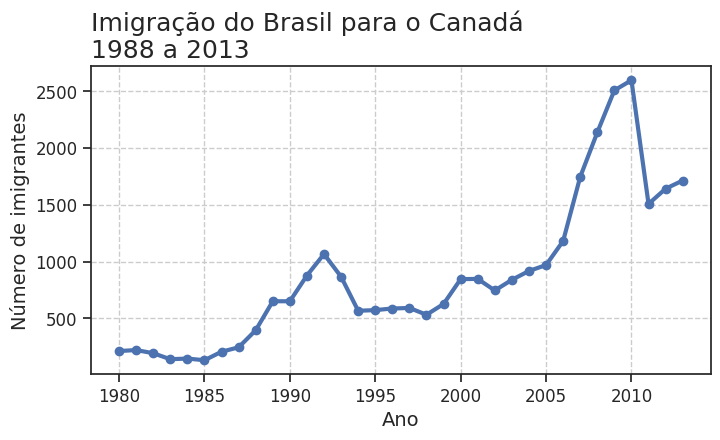

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker='o')
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--')
plt.show()

##Alterando cores - #1

Para começar, abriremos a [documentação Matplotlib Color Documentation](https://matplotlib.org/stable/gallery/color/named_colors.html). Nesta página, podemos ver as várias opções de cores disponíveis para serem usadas nos gráficos. Algumas opções de cores incluem:

Base colors;
Tableau palette;
CSS colors.
As base colors são as cores mais básicas pré-definidas e na frente do retângulo de cada cor temos a letra que representa a cor. São elas azul(b), verde(g), vermelho(r), ciano(c), magenta(m), amarelo(y), preto(k) e branco(w).

A tableau pallet contém outras cores pré-definidas e bem distintas entre si, sendo ideal para trabalhar com dados categóricos. Por fim, temos as CSS colors, usadas para aplicações web e criação de interfaces.

Em ambos os casos temos o nome das cores. Então, para usar uma cor, basta analisarmos qual delas é mais adequada para o nosso gráfico e usar o nome da cor, presente na documentação.

Voltando ao Google Colab, vamos analisar o último gráfico que obtivemos. Antes de fazemos alterações, removeremos o grid que colocamos, apagando o código plt.grid(linestyle='--') que está na penúltima linha do código.

Para alterar a cor da linha do gráfico, podemos adicionar o parâmetro color na função ax.plot(). Portanto, após o lw=3, escreveremos uma vírgula e codaremos color='g' para testarmos como ficará com o verde da basic colors.

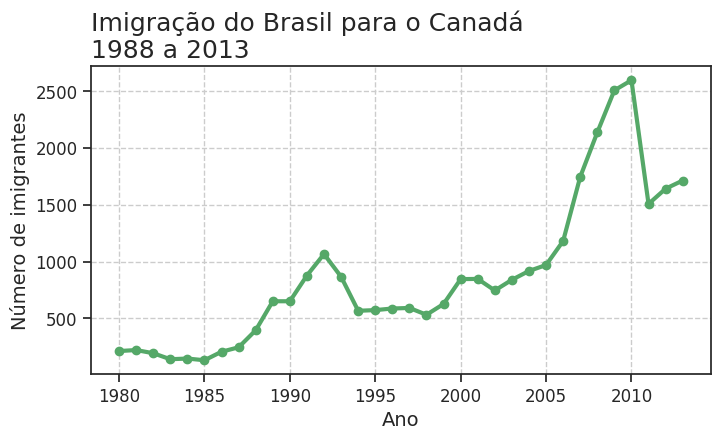

In [ ]:
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, marker='o', color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1988 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
plt.grid(linestyle='--')
plt.show()

In [ ]:
df.head()

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15


Ao executarmos o código, o gráfico aparece com a linha na cor verde, ou seja, conseguimos mudar a cor do gráfico com apenas uma variável. No entanto, como alterar as cores quando há múltiplas variáveis?

Para ilustrar isso, vamos comparar o Brasil com todos os países da América do Sul. Inclusive avaliaremos os números totais de imigrantes para cada um desses países para compararmos como o Brasil está posicionado em relação a eles durante esse período.

Antes de começarmos, vamos relembrar o conteúdo do nosso DataFrame executando df.head() em uma nova célula. Temos como retorno uma tabela que tem as colunas "País", "Continente", "Região", uma coluna para os dados de cada ano no intervalo entre 1980 e 2013 e, por fim, a coluna "Total".

Para selecionar somente os países da América do Sul, podemos fazer uma consulta utilizando a função query que filtra esses resultados. Faremos isso em uma variável chamada america_sul que será igual a df.query('Região == "América do Sul"').

In [ ]:
america_sul = df.query('Região == "América do Sul"')
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


Ao executarmos esse código, chamando america_sul, recebemos um DataFrame de 12 linhas e 37 colunas contendo apenas as informações dos países da América do Sul. Como criar um gráfico com isso?

Nós podemos plotar um gráfico que contenha o número total de imigrações para cada um dos países. Quando falamos em gráficos que têm quantidade, o ideal é utilizar um gráfico de barras ao invés de um gráfico de linhas. Então vamos testar agora fazer um gráfico de barras.

Para criá-lo, primeiro acessaremos uma nova célula após a tabela america_sul e codaremos fig, ax = plt.subplots(figsize=(12,5)). Com isso, criamos uma figura indicando que ela tem os eixos e indicamos o tamanho dela com o parâmetro figsize.

Pressionamos "Enter" e, na linha de código abaixo, usaremos outra função do Matplotlib, que é a ax.bar(), para definir quem será o eixo X e o eixo Y do gráfico. O eixo X será o eixo dos países, cada um representado por uma barra, já o eixo Y será o valor da coluna "Total". Representamos isso com o código ax.bar(america_sul.index, america_sul['Total']).

Além disso, adicionaremos cores diferentes para cada barra. Para isso, após o america_sul['Total'], escreveremos uma vírgula e passaremos o parâmetro color. Se usaremos várias cores para esse parâmetro, precisamos passar uma lista para ele. No caso, eu já fiz uma lista para adiantar nosso trabalho.

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning:

Glyph 1 () missing from current font.



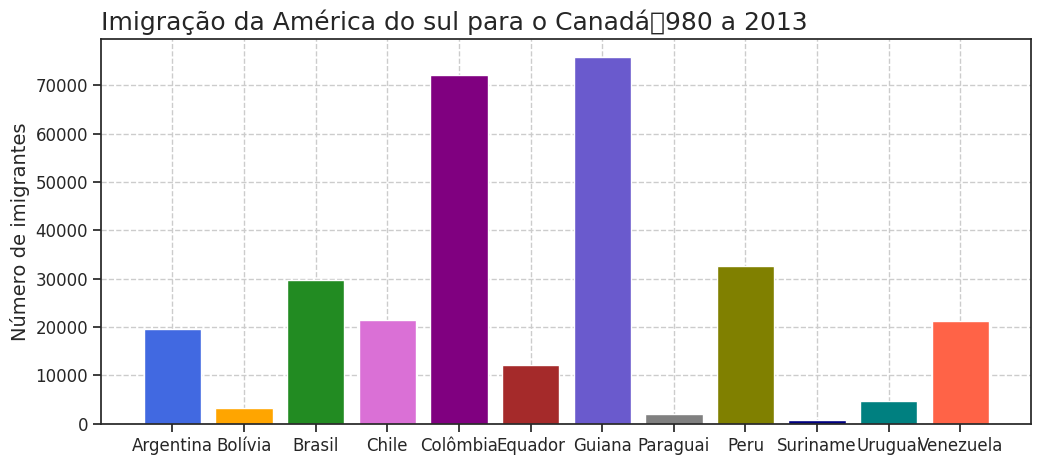

In [ ]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12,5))
ax.bar(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('Imigração da América do sul para o Canadá\1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

plt.show()

##Alterando cores - #2

Para criar esse gráfico invertido, voltaremos para o código. Na linha onde temos o ax.bar(), colocaremos um h antes de abrirmos os parênteses, então ficará barh. Isso significa que criaremos um gráfico de barras na horizontal. Vamos pressionar "Shift + Enter" e executar essa célula para entendermos o que vai acontecer.

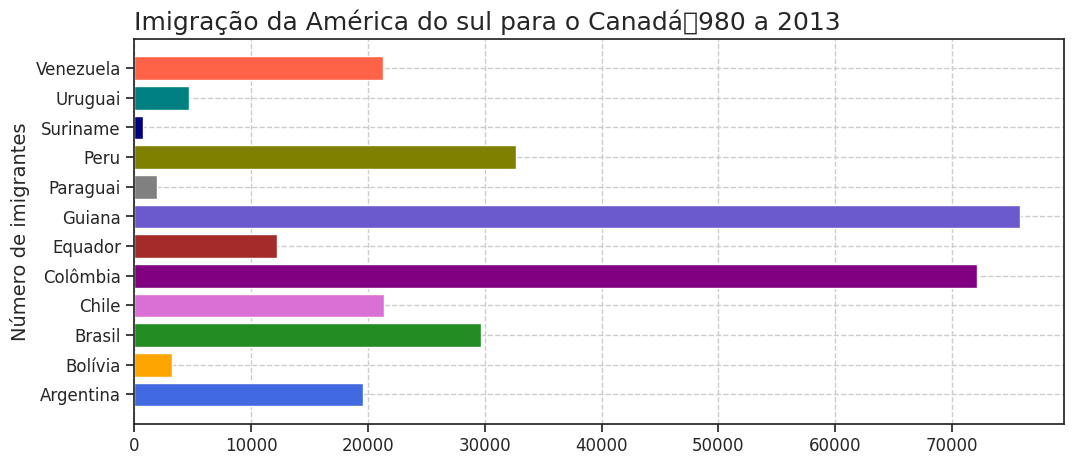

In [ ]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('Imigração da América do sul para o Canadá\1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('')
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

plt.show()

Invertemos o gráfico e agora as barras estão na horizontal. Além disso, os nomes dos países estão no eixo Y e o número de imigrantes está no eixo X. Entretanto, quando invertemos, precisamos também alterar o título dos eixos, porque agora o rótulo "Número de imigrantes" precisa se no eixo X, ao invés de permanecer no eixo Y, como está.

Vamos fazer essa alteração subindo no código. Então teremos ax.set_xlabel('Número de imigrantes', fontsize=14). Além disso, no ax.set_ylabel, que é a label do eixo Y, deixaremos apenas duas aspas simples, ax.set_ylabel('').

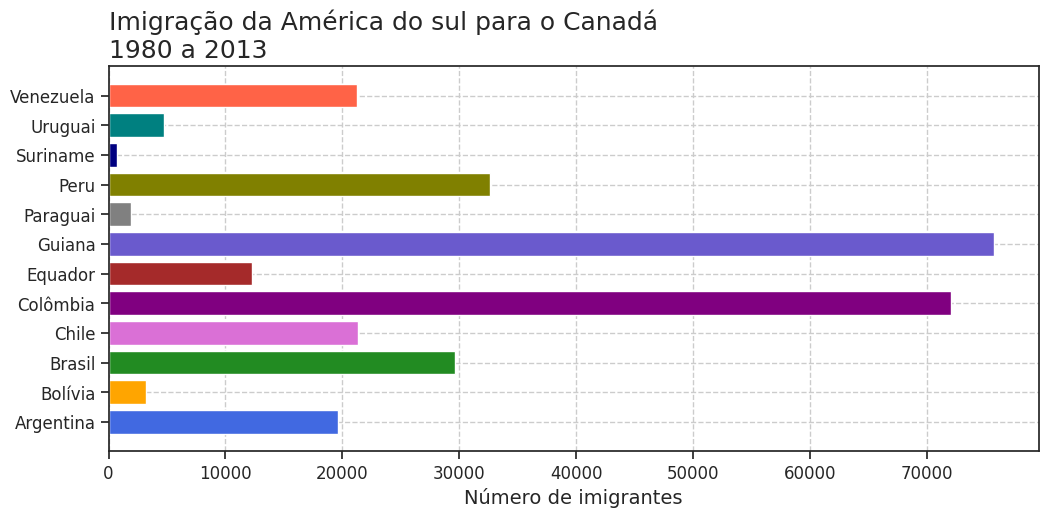

In [ ]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul.index, america_sul['Total'], color=cores)
ax.set_title('Imigração da América do sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

plt.show()

Executando agora, temos tudo corretamente: o número de imigrantes está embaixo, temos os países no eixo Y com uma barra para cada um e é possível ler qual é cada um deles. Porém, o gráfico ainda não está muito legal. Percebemos que temos barras com tamanhos bem diferentes, algumas muito grandes e outras muito pequenas.

O ideal, quando temos um gráfico de barras, é ordená-las do maior para o menor valor, deixando visualmente mais bonito e interessante de se ver. Assim, já conseguimos olhar para o gráfico e ter alguns insights só observando.

Podemos consertar isso ordenando nosso dataframe pelo valor total do maior para o menor valor. Para fazermos isso, criaremos um novo dataframe em uma célula abaixo do nosso gráfico de barras horizontais.

Chamaremos esse dataframe de america_sul_sorted e ordenaremos as colunas usando a função sort_values(). Portanto, escrevemos america_sul.sort_values(), e passamos qual coluna queremos usar para ordenar esse dataframe dentro dos parâmetros dessa função.

Neste caso, usaremos a coluna "Total", portanto escrevemos ('Total', ascending=True). Além do nome da coluna, passamos o parâmetro ascending, que garante que a ordenação seja do maior para o menor valor. Sendo assim, nosso código ficou:

In [ ]:
america_sul_sorted = america_sul.sort_values('Total', ascending=True)
america_sul_sorted

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Suriname,América Latina e o Caribe,América do Sul,15,10,21,12,5,16,7,46,...,15,16,20,9,12,13,11,16,4,739
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Uruguai,América Latina e o Caribe,América do Sul,128,132,146,105,90,92,137,269,...,217,175,147,160,99,93,81,47,58,4715
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Venezuela,América Latina e o Caribe,América do Sul,103,117,174,124,142,165,179,229,...,1211,1192,1335,1239,1353,998,1452,1373,1022,21267
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659


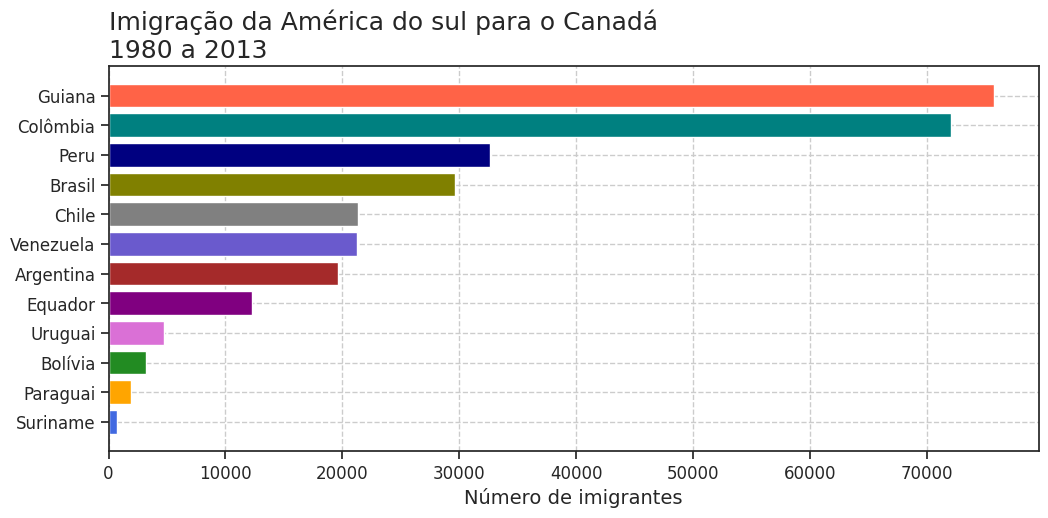

In [ ]:
cores = ['royalblue', 'orange', 'forestgreen', 'orchid', 'purple', 'brown', 'slateblue', 'gray', 'olive', 'navy', 'teal', 'tomato']

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('Imigração da América do sul para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

plt.show()

Executando essa célula, notamos que o resultado ficou visualmente muito melhor. Temos da barra maior até a barra menor e é possível identificar que Guiana é o país com o maior número de imigrantes, seguido de Colômbia, Peru e o Brasil, que ficou em quarto lugar. E os países com menores valores, do de maior para o de menor valor, são Uruguai, Bolívia, Paraguai e Suriname.

Como nosso foco é o Brasil, poderíamos enfatizá-lo. Podemos destacar a barra do Brasil em relação às outras e indicar, no título, que "Brasil é o quarto país com mais imigrantes para o Canadá no período de 1980 a 2013". Ficaria interessante fazer algo assim, ao invés de deixar uma barra com cada cor.

Para destacar uma informação, nós podemos criar uma estratégia interessante. Voltaremos para o código de plotagem do gráfico e na primeira linha, onde temos a lista cores, apagaremos as cores da lista. Criaremos uma lista vazia de cores, escrevendo cores = [].

Agora, criaremos uma instrução fora da lista, na linha de baixo, que vai iterar sobre os nomes dos países. Quando for o Brasil, colocaremos uma cor específica e os outros países ficarão com outra cor. Para fazer esse for, escreveremos for pais in america_sul_sorted.index: e pressionaremos "Enter".

Na linha de baixo, escreveremos if e um else. Nosso if será if pais == "Brasil":, ou seja, se o país for "Brasil". Após os dois pontos pressionamos "Enter" e, na linha abaixo escrevemos cores.append('green'), passando a cor que desejamos entre os parênteses, que no caso foi o verde (green).

Isso significa que for passará por cada index do nosso america_sul_sorted e, se o país for "Brasil", ele vai adicionar na lista a cor verde. Agora nós faremos o nosso else para caso o país não for o Brasil o país.

Para isso escrevemos else:, pressionamos "Enter" e na linha de baixo codamos cores.append('silver') para deixarmos uma cor bem clara, que é um cinza (silver). Está prontinho o nosso código.

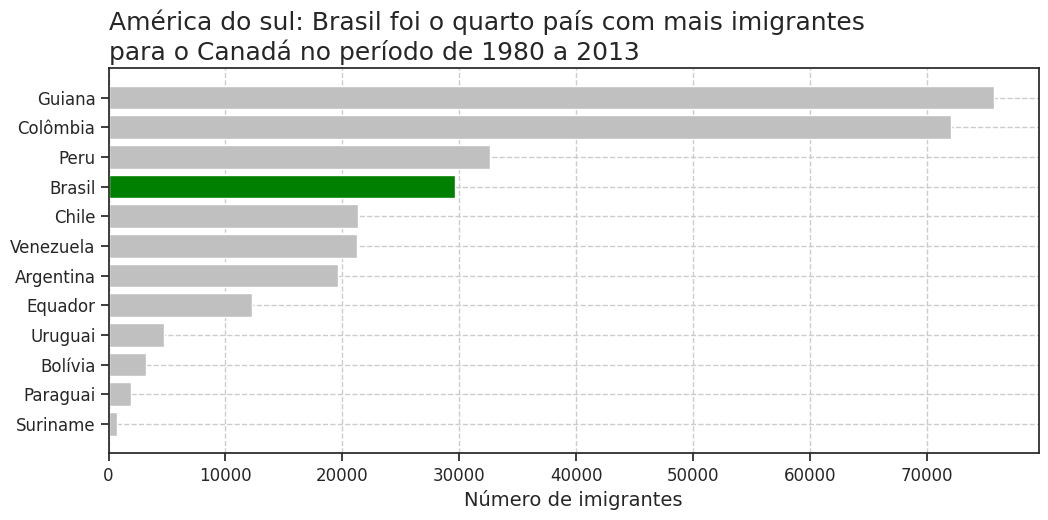

In [ ]:
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
     cores.append('green')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

plt.show()

##Adicionando anotações

Nós criamos uma figura que contém os dados de todos os países da América do Sul, com o número total de imigrantes para cada um deles, e destacamos que o Brasil ficou em quarto lugar nesse período de 1980 a 2013. Porém, podemos melhorá-lo.

Temos essa escala no eixo X, que vai de zero a 70 mil, graduando em 10mil. Porém fica difícil determinar a quantidade de imigrantes nesse período para os países Uruguai, Bolívia, Paraguai e Suriname, porque os valores estão bem no início da escala. Para as barras maiores é mais fácil ter uma ideia aproximada dos valores observando o gráfico.

Porém é possível adicionar anotações em uma figura. Podemos, por exemplo, colocar o número total ao lado de cada uma das barras. Isso facilita muito o entendimento, porque a pessoa pode olhar para a barra, ver o número ao lado e entender rapidamente quantos imigrantes cada país teve. Então, vamos adicionar anotações nessas barras.

Para fazer isso, voltaremos ao código do último vídeo e, no começo da linha plt.show(), pressionaremos "Enter" algumas vezes. Acima dessa linha, adicionaremos um for que fará essa iteração para adicionar os valores máximos de cada barra. A primeira linha do nosso código será uma função enumerate() que vai iterar sobre cada item da coluna do valor total.

Nesse for, atribuiremos a posição de cada item a uma variável chamada i e usaremos a letra v para estar relacionada a cada variável. Para isso, escreveremos:

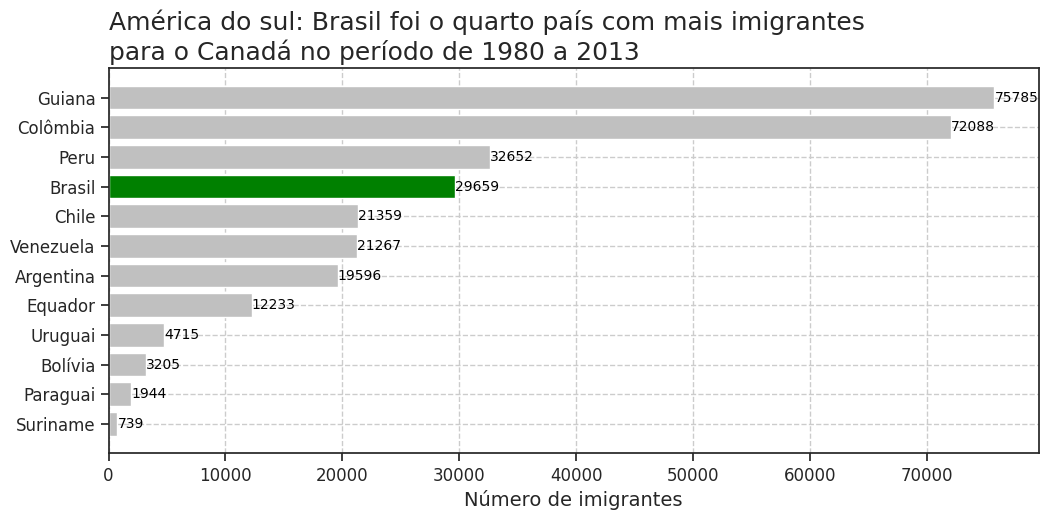

In [ ]:
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
     cores.append('green')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

plt.show()

Dentro do text() passamos vários parâmetros para adicionarmos esse valores. O primeiro foi v + 20, indicando a posição onde o texto será adicionado, onde o v corresponde a cada uma das barras. O i é a posição Y do nosso texto. Por fim, usamos o str() para indicar que vamos converter o tamanho de cada barra em uma string, que será o nosso texto.

Depois disso, usamos colorpara passar uma cor para esse texto que será adicionado, no caso, preto (black). Para o tamanho da fonte testaremos 10 pixels, então usamos fontsize=10.

Adicionamos também o parâmetro ha, que é o alinhamento horizontal do texto, que ficará posicionado à esquerda (left). O último parâmetro foi o va='center', definindo o alinhamento vertical do nosso texto para o centro. Agora podemos testar se esse código está funcionando corretamente.

Ao executarmos a célula, reparamos que conseguimos mostrar os valores totais de cada uma das barras. Agora conseguimos visualizar, por exemplo, que a Guiana tem 75.785 imigrantes nesse período todo e o Brasil está com 29.659, então fica muito mais fácil de entender. Também conseguimos visualizar quantos imigrantes nós temos no Uruguai, na Bolívia, no Paraguai, e no Suriname.

Mais uma coisa, temos essa caixa que está em volta das barras, que é chamada de frame. Ela acaba atrapalhando a visualização e não é tão necessária. Então podemos retirar essa caixa em volta, e descobriremos como fazer isso.

Subindo de volta no código, antes do plt.show(), escreveremos ax.set_frame_on(False), declarando que esse parâmetro é igual a false. Isso porque, automaticamente, os gráficos do Matplotlib têm esse parâmetro como True, então sempre colocam essa caixa em volta.

Executando esse código, teremos o gráfico sem essa caixa, ficando mais limpo e fácil de entender. O que podemos fazer agora é retirar o eixo X, porque já temos os valores de cada uma das barras, então ele não é mais necessário;

Voltando ao código, após o ax.set_frameon(False), pressionaremos "Enter" e, na linha de baixo, escreveremos ax.get_xaxis().set_visible(False). Com esse código, declaramos a visibilidade do eixo x, que nos referimos como xaxis é False. Executando essa célula, o nosso eixo X não aparece mais, deixando o gráfico bem limpo.

Uma última coisa que podemos fazer aqui juntos, é retirar os traços que aparecem após o nome de cada país, podemos deixar sem nada. Para isso, voltamos ao código e, abaixo desse parâmetro que acabamos de adicionar, codaremos ax.tick_params(axis='both', which='both', length=0).

Nesse código declararamos ambos (both) os parâmetros, e informamos que queremos o comprimento (length) dos ticks de ambos igual a zero. Cabe lembrar que mesmo declarando essa configuração para o eixo X e Y, estamos trabalhando apenas com o eixo Y. Assim, os ticks dele serão removidos, deixando o gráfico ainda mais limpo e fácil de entender.

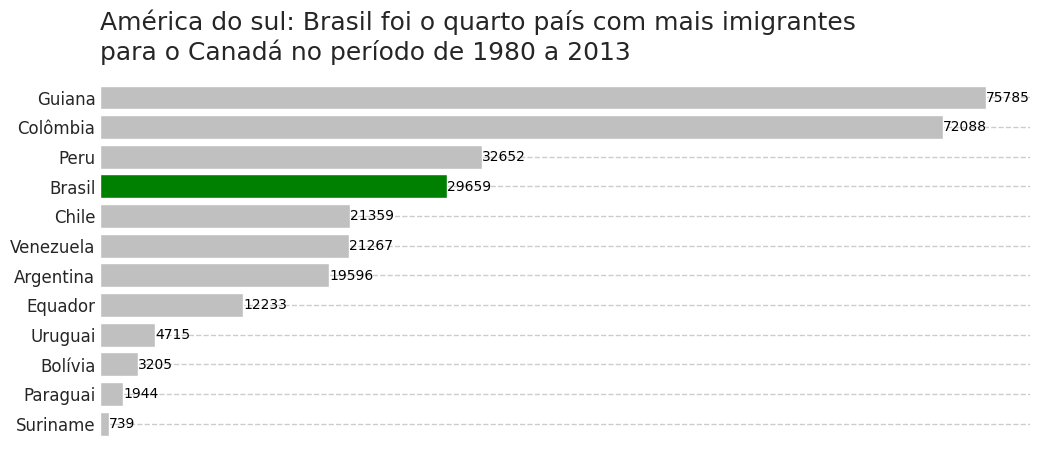

In [ ]:
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
     cores.append('green')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do sul: Brasil foi o quarto país com mais imigrantes\npara o Canadá no período de 1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

plt.show()

##Salvando os gráficos

In [ ]:
print(fig.canvas.get_supported_filetypes())

{'eps': 'Encapsulated Postscript', 'jpg': 'Joint Photographic Experts Group', 'jpeg': 'Joint Photographic Experts Group', 'pdf': 'Portable Document Format', 'pgf': 'PGF code for LaTeX', 'png': 'Portable Network Graphics', 'ps': 'Postscript', 'raw': 'Raw RGBA bitmap', 'rgba': 'Raw RGBA bitmap', 'svg': 'Scalable Vector Graphics', 'svgz': 'Scalable Vector Graphics', 'tif': 'Tagged Image File Format', 'tiff': 'Tagged Image File Format', 'webp': 'WebP Image Format'}


##Primeiro gráfico

Com esse código, obtemos um dicionário contendo os tipos de formatos que podemos salvar os nossos arquivos, entre eles o EPS, o JPG e o PDF. O formato que eu indico para salvarmos esses dados é o formato PNG. Ele é um formato amplamente aceito por softwares e consegue ter uma resolução boa quando o salvamos.

Portanto, salvaremos os arquivos no formato PNG. Eu já separei o código daquele gráfico que tem a imigração do Brasil para o Canadá, que foi o último que nós geramos. Depois que o customizamos, ele está pronto para ser salvo.

A última coisa que eu faria para melhorar esse gráfico ainda mais é retirar o frame da parte de cima e o da direita para deixar nosso gráfico aberto e, consequentemente, bem mais bonito. Para fazer isso, adicionaremos duas linhas de código antes do plt.show() do código desse gráfico:

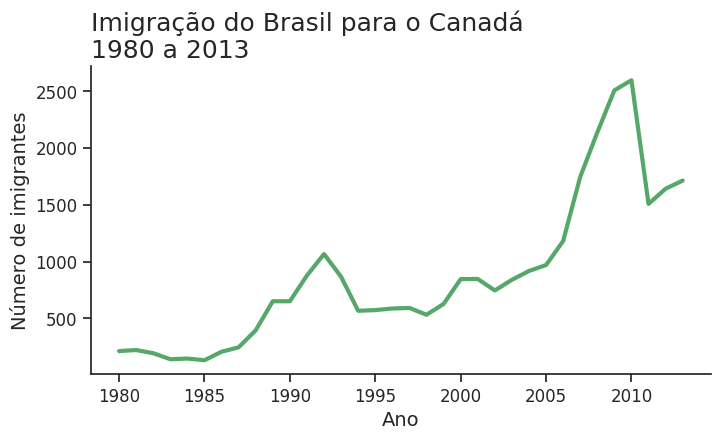

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(dados_brasil['ano'], dados_brasil['imigrantes'], lw=3, color='g')
ax.set_title('Imigração do Brasil para o Canadá\n1980 a 2013', fontsize=18, loc='left')
ax.set_xlabel('Ano', fontsize=14)
ax.set_ylabel('Número de imigrantes', fontsize=14)
ax.yaxis.set_tick_params(labelsize=12)
ax.xaxis.set_tick_params(labelsize=12)
ax.xaxis.set_major_locator(plt.MultipleLocator(5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig.savefig('imigracao_brasil_canada.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

Ao executarmos esse código, observamos que o gráfico fica bem mais interessante visualmente sem aquela linha embaixo do título, que ficou bem destacado, e sem aquela barra lateral. Agora podemos salvar esse gráfico e usá-lo.

Para salvar, voltamos ao código e, antes do plt.show(), escrevemos: fig.savefig(). Essa função aceita vários parâmetros, e o primeiro deles que iremos declarar será o nome do gráfico que será salvo com extensão dele. Para isso, escreveremos "imigracao_brasil_canada.png".

Além disso, quando salvamos em PNG, podemos utilizar algumas outras opções, como deixar o fundo transparente ou um fundo branco. Pediremos para ele não deixar o fundo transparente, usando o argumento transparent=False. Assim nosso fundo continua branco.

Dica: Não é interessante deixar o fundo transparente porque, dependendo de onde adicionarmos esse gráfico posteriormente, a cor do fundo pode atrapalhar a leitura do gráfico, por exemplo, um fundo escuro.

Também podemos adicionar o parâmetro dpi, que está relacionado com a resolução da imagem: quanto maior o dpi, maior será essa resolução. Codaremos dpi=300, que já é um valor ótimo. Além disso, podemos incluir o parâmetro bbox_inches='tight'. Esse parâmetro ajusta os limites da figura ao nosso gráfico.

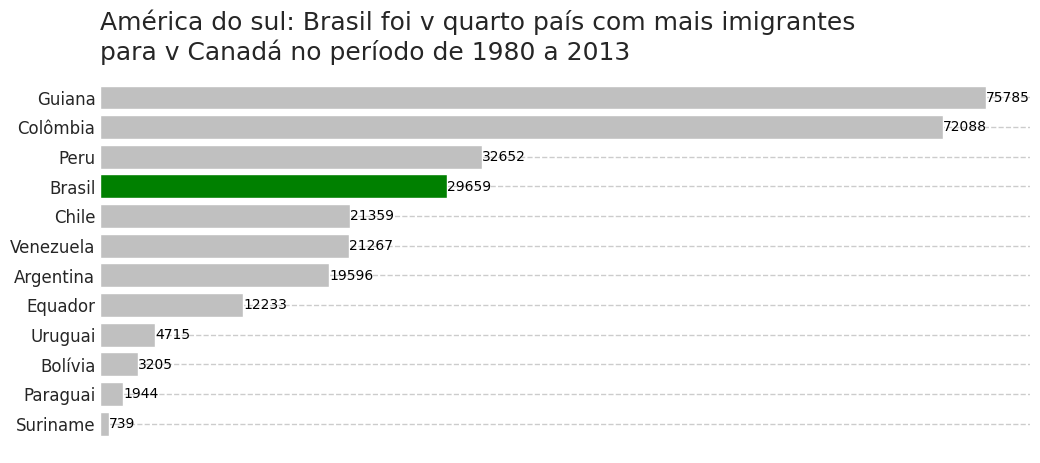

In [ ]:
cores = []
for pais in america_sul_sorted.index:
  if pais == 'Brasil':
     cores.append('green')
  else:
    cores.append('silver')

fig, ax = plt.subplots(figsize=(12,5))
ax.barh(america_sul_sorted.index, america_sul_sorted['Total'], color=cores)
ax.set_title('América do sul: Brasil foi v quarto país com mais imigrantes\npara v Canadá no período de 1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')
ax.xaxis.set_tick_params(labelsize=12)
ax.yaxis.set_tick_params(labelsize=12)
ax.grid(True, linestyle='--')

for i, v in enumerate(america_sul_sorted['Total']):
  ax.text(v + 20, i, str(v), color='black', fontsize=10, ha='left', va='center')

ax.set_frame_on(False)
ax.get_xaxis().set_visible(False)
ax.tick_params(axis='both', which='both', length=0)

fig.savefig('imigracao_america_sul.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

## Trabalhando com Seaborn

A biblioteca Seaborn é baseada na Matplotlib e oferece vantagens adicionais. Com ela, é possível criarmos gráficos bonitos e elegantes com poucas linhas de código. Além disso, ela possui paletas de cores e permite a criação de diversas visualizações interessantes.

Vamos visualizar alguns exemplos de gráficos que podem ser criados com essa biblioteca na seção de [Example gallery.](https://seaborn.pydata.org/examples/index.html) Nesta seção do site temos diversos estilos diferentes de gráficos, com cores diferentes.

In [ ]:
import seaborn as sns

Também é possível utilizarmos alguns temas desta biblioteca para criar os gráficos, os quais oferecem opções de estilização de fundo. Voltando ao site com os exemplos, existem fundos disponíveis tanto em tons escuros como claros. No entanto, optaremos por utilizar o tema padrão desta biblioteca.

Agora vamos conhecê-lo.

In [ ]:
sns.set_theme()

Executamos a célula teclando "Enter".

Assim que um tema específico é selecionado, ele será aplicado a todos os gráficos subsequentes, a menos que seja alterado novamente. Portanto, todos os próximos gráficos seguirão o tema padrão escolhido.

A próxima etapa do nosso projeto é obter uma visualização abrangente da imigração desses países para o Canadá. Vamos criar um top 10 dos países que mais registraram imigrantes para o Canadá.

Para criar o top 10 dos países com maior número de imigrantes para o Canadá, criaremos um novo dataframe chamado top_10, que será uma cópia do dataframe original df: top_10 = df..

Para criarmos o top 10 dos países com base nos valores mais altos, em ordem decrescente, utilizamos o método sort_values(). Vamos aplicá-lo à coluna "Total" para ordenar os valores com base no número total de pessoas que migraram.

Além disso, definiremos o parâmetro ascending como False, para obter a ordenação em ordem decrescente. Para selecionar apenas os 10 primeiros países, utilizaremos o método .head(10) no final. Dessa forma, obteremos o top 10 dos países com mais imigrantes.

In [ ]:
top_10 = df.sort_values('Total', ascending=False).head(10)
top_10

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Índia,Ásia,Sul da Ásia,8880,8670,8147,7338,5704,4211,7150,10189,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Ásia,Ásia Oriental,5123,6682,3308,1863,1527,1816,1960,2643,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
Reino Unido e Irlanda do Norte,Europa,Norte da Europa,22045,24796,20620,10015,10170,9564,9470,21337,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Filipinas,Ásia,Sudeste Asiático,6051,5921,5249,4562,3801,3150,4166,7360,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Paquistão,Ásia,Sul da Ásia,978,972,1201,900,668,514,691,1072,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
Estados Unidos da América,América do Norte,América do Norte,9378,10030,9074,7100,6661,6543,7074,7705,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Irã,Ásia,Sul da Ásia,1172,1429,1822,1592,1977,1648,1794,2989,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Ásia,Sul da Ásia,185,371,290,197,1086,845,1838,4447,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
República da Coreia,Ásia,Ásia Oriental,1011,1456,1572,1081,847,962,1208,2338,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


##Plotagem de um gráfico de barras

Agora, podemos prosseguir com a plotagem de um gráfico de barras. Dessa forma, poderemos visualizar de maneira clara e comparativa o valor total para cada um desses países selecionados.

Para criarmos um gráfico de barras com o Seaborn, é um pouco diferente. Vamos aprender isso agora. Colocamos:

sns.barplot()Copiar código
Sendo barplot() a função para plotar gráfico de barras na biblioteca Seaborn.

Abrimos parênteses e agora definiremos três parâmetros essenciais. O primeiro parâmetro é chamado de data, que indica qual dataframe estamos utilizando, neste caso, é o top_10. Em seguida, especificaremos quem será o nosso eixo x, ou seja, a variável que será representada no eixo horizontal do gráfico. Neste caso, utilizaremos o index desse dataframe, onde temos os países listados. Vamos colocar top_10.index.

`sns.barplot(data=top_10, x=top_10.index)`

Agora, falta mencionar o nosso parâmetro y. O y será igual à coluna total. Como já estamos indicando o dataframe no parâmetro data, não é necessário mencionar o nome do dataframe novamente ao passar a coluna.

Nós colocamos diretamente o nome da coluna no parâmetro y. Ao abrir aspas, inserimos o "total", que é o nome da coluna, e executamos essa célula.

<Axes: xlabel='País', ylabel='Total'>

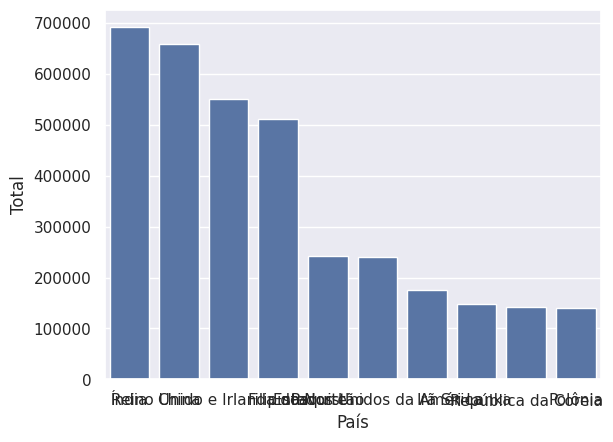

In [ ]:
sns.barplot(data=top_10, x='País', y='Total')

##Customizando o gráfico

Para criar um gráfico de barras horizontal, seguiremos os seguintes passos. Utilizaremos o sns.barplot e passaremos o parâmetro data, que será igual ao top_10. Agora, a única modificação necessária será trocar o parâmetro x pelo y. Essa alteração se faz necessária porque inverteremos o gráfico.

Portanto, o y será o index do dataframe, o que significa que usaremos top_10.index. Em seguida, colocaremos uma vírgula. Quanto ao parâmetro x, agora será a coluna total, uma vez que estamos invertendo o gráfico. Para isso, inseriremos o valor "total" entre aspas.

Uma informação importante é que precisamos adicionar um parâmetro chamado orient, que define a orientação do gráfico. Portanto, vamos incluir o parâmetro orient e atribuir o valor 'h' entre aspas, indicando que a orientação será horizontal.

<Axes: xlabel='Total', ylabel='País'>

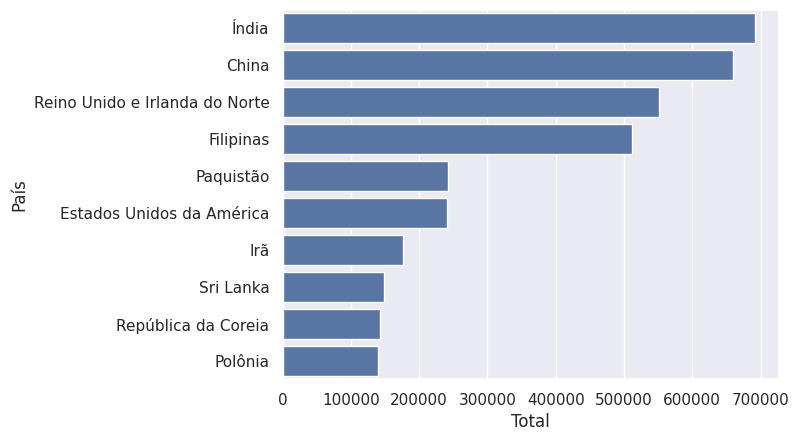

In [ ]:
sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

Vamos começar adicionando um título ao gráfico. Para isso, iremos atribuir a função barplot ao eixo, na variável ax que já utilizamos anteriormente. Portanto, vamos escrever ax = sns.barplot e passar os parâmetros dentro dos parênteses.

Vamos passar o parâmetro data como igual a top_10. Em relação ao eixo Y, utilizaremos top_10.index, e para o eixo X, usaremos a coluna total, representada pelo valor 'total' entre aspas simples. Também precisamos definir a orientação do gráfico, que será horizontal. Portanto, atribuiremos o parâmetro orient com o valor 'h' entre aspas simples.

Para adicionar o título ao gráfico, podemos utilizar o método set da variável ax. Dentro desse método, podemos passar várias informações, começando pelo título. Vamos definir o título utilizando ax.set(title="Países com maior imigração para o Canadá\n1980 a 2013"). Note que utilizamos a barra invertida e a letra "N" para inserir a próxima linha do título para inserir "1980 a 2013.

Na próxima linha de código, podemos definir as labels para os rótulos dos eixos X e Y. Vamos começar com o eixo X utilizando xlabel e definindo a label como "Número de Imigrantes": . Em seguida, vamos adicionar uma vírgula e avançar para a próxima linha.

Agora, atribuímos o título ao eixo y, que indica a presença dos países. No entanto, para evitar poluição visual, optamos por deixar apenas a informação de "países" no título sem o "País" do lado do eixo Y. Deixamos a ylabel vazia, sem nenhuma informação específica, para que não seja adicionado texto adicional ao gráfico.

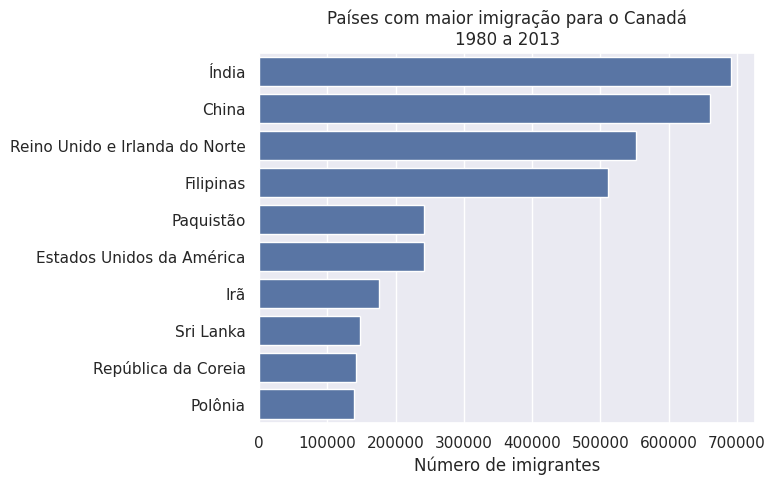

In [ ]:
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h')

ax.set(title='Países com maior imigração para o Canadá\n1980 a 2013',
       xlabel='Número de imigrantes',
       ylabel='')


plt.show()

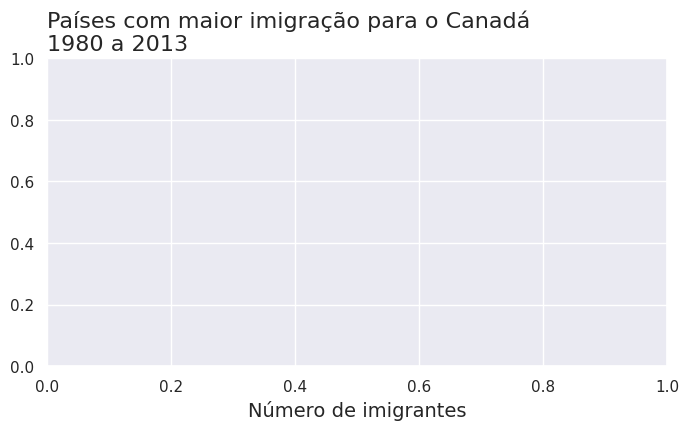

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))


ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=16)
ax.set_xlabel('Número de imigrantes', fontsize=14)
ax.set_ylabel('')

plt.show()

[Na documentação, temos diversas opções.](https://seaborn.pydata.org/tutorial/color_palettes.html)

Dispomos de diversos tipos de paletas, incluindo paletas qualitativas, paletas categóricas e paletas de cores sequenciais. As paletas qualitativas são compostas por cores distintas, as paletas categóricas são adequadas para categorias específicas, enquanto as paletas de cores sequenciais consistem em um gradiente de cores, variando de tons mais escuros a mais claros.

Além disso, temos as paletas divergentes, onde diferentes cores são usadas nas extremidades. Agora, como podemos determinar qual paleta é mais adequada aos nossos dados? Vamos analisar isso a seguir.

Vamos criar uma função no Google Colab para gerar o gráfico, e essa função receberá um argumento para especificar o nome da paleta de cores. Assim, poderemos testar diferentes tipos de paletas e determinar qual delas se adequa melhor aos nossos dados. Começaremos criando a função.

Vamos ao Google Colab.

Vamos criar a função chamada gerar_gráfico_paleta com um argumento chamado palette para passar o nome da paleta desejada. Em seguida, usaremos dois pontos e iniciaremos a criação da figura na linha seguinte.

Na próxima linha, vamos adicionar o seguinte código: fig, ax = plt.subplots(figsize=(8, 4)). Isso criará a figura do gráfico com o tamanho especificado de 8 por 4 unidades. Em seguida, iremos plotar o gráfico utilizando as informações que já temos, mas adicionando palette=palette no final para utilizar a paleta de cores especificada. Assim, ao chamarmos essa função, passamos o nome da paleta.

Além disso, vamos inserir um título e as etiquetas dos eixos. O eixo X será "Número de imigrantes" e o eixo Y ficará vazio. Depois exibimos o gráfico.

In [ ]:
def gerar_grafico_paleta(palette):
  fig, ax = plt.subplots(figsize=(8,4))
  ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette=palette)
  ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013',loc='left', fontsize=18)
  ax.set_xlabel('Número de imigrantes', fontsize=14)
  ax.set_ylabel('')

  plt.show()

<ipython-input-142-dd7ef46280ef>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




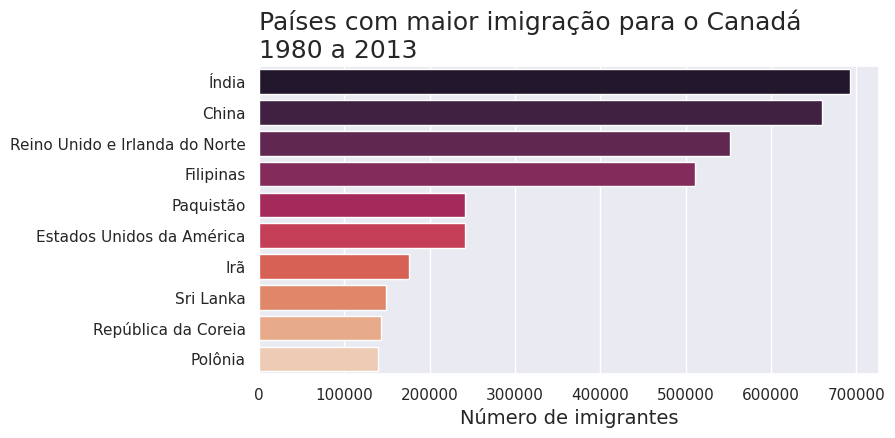

In [ ]:
gerar_grafico_paleta('rocket')

<ipython-input-142-dd7ef46280ef>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




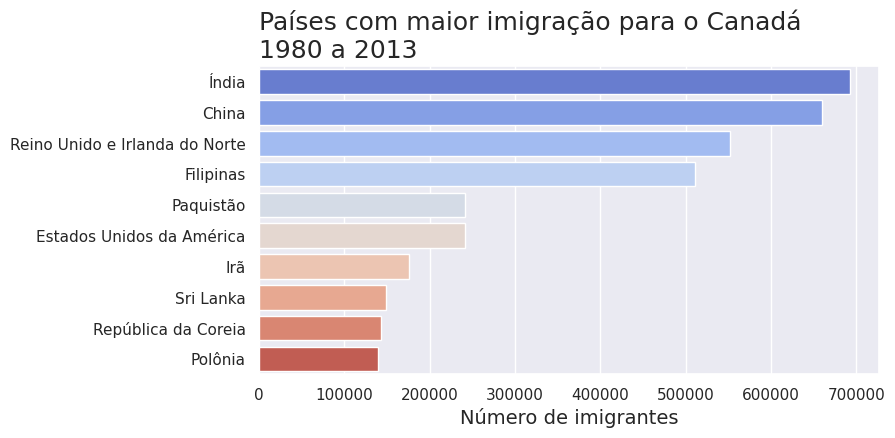

In [ ]:
gerar_grafico_paleta('coolwarm')

<ipython-input-142-dd7ef46280ef>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




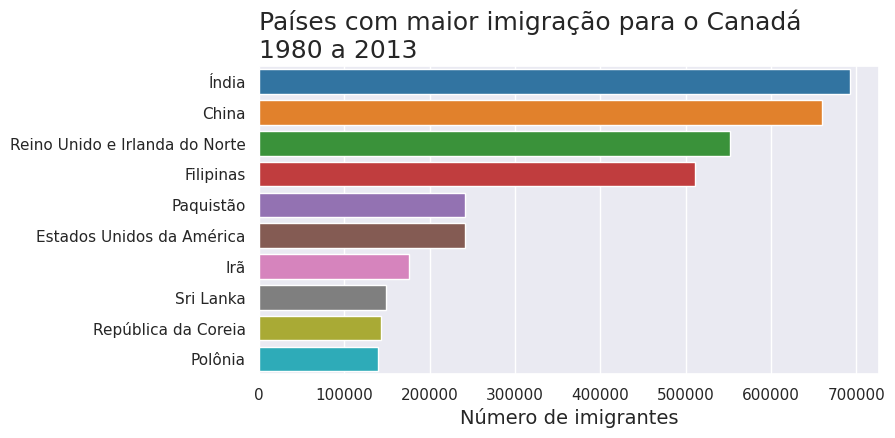

In [ ]:
gerar_grafico_paleta('tab10')

## Explorando temas

Conforme mencionado anteriormente, podemos explorar diferentes temas disponíveis na biblioteca Seaborn. Vamos prosseguir e testar alguns deles para ver como eles afetam a aparência do nosso gráfico.

No Google Colab, vamos explorar um tema chamado de Dark.

Para alterar o tema do gráfico, utilizamos novamente a função sns.set_theme(style='Dark') e passamos o estilo desejado como argumento. No caso, vamos utilizar o estilo "dark" para obter um tema mais escuro. Na sequência, plotamos o gráfico usando a função que criamos anteriormente chamada gerar_grafico_paleta passando a paleta categórica, Tab10.

<ipython-input-142-dd7ef46280ef>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




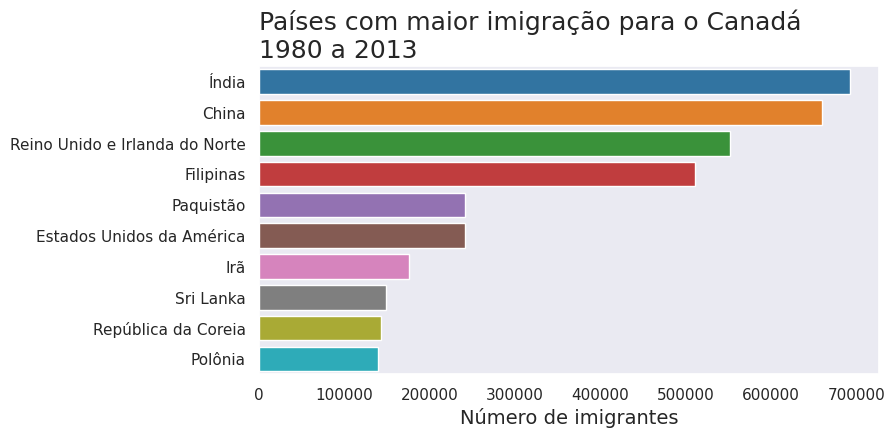

In [ ]:
sns.set_theme(style='dark')
gerar_grafico_paleta('tab10')

<ipython-input-142-dd7ef46280ef>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




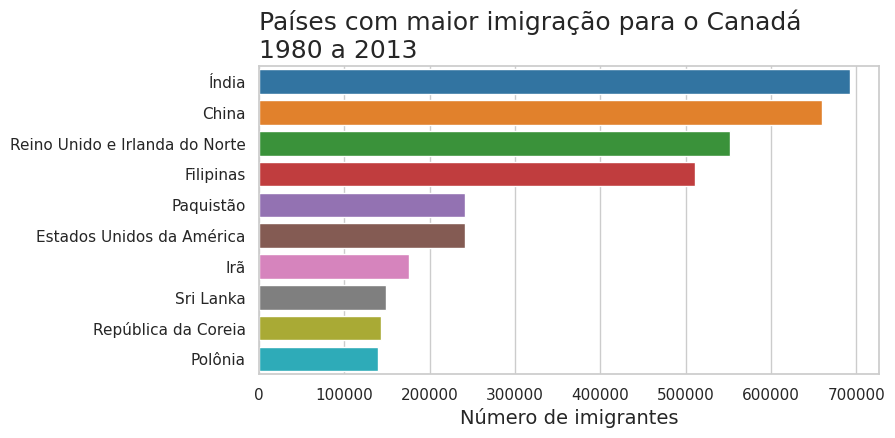

In [ ]:
sns.set_theme(style='whitegrid')
gerar_grafico_paleta('tab10')

<ipython-input-142-dd7ef46280ef>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




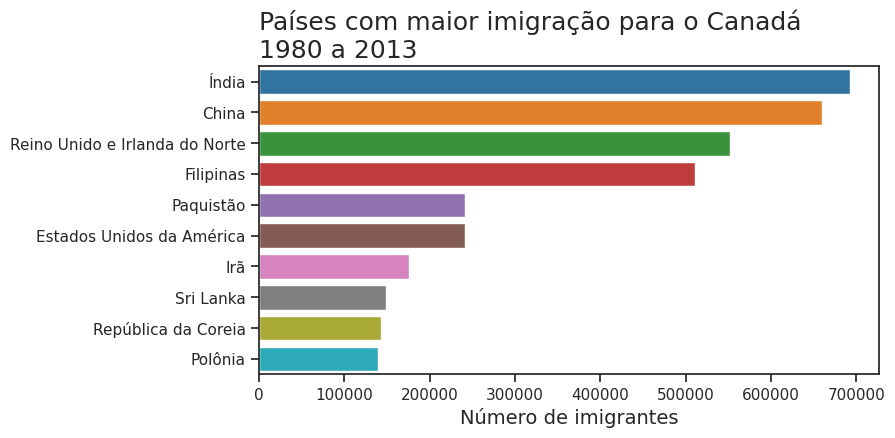

In [ ]:
sns.set_theme(style='ticks')
gerar_grafico_paleta('tab10')

Outro detalhe interessante é que durante nosso trabalho com a biblioteca Matplotlib, discutimos bastante sobre a remoção do quadro interno dos gráficos (frame), pois ele se assemelha a uma caixa. Podemos realizar essa tarefa de forma mais simples e conveniente utilizando a biblioteca Seaborn.

Vamos entender agora como executar esse procedimento.

Na próxima célula do Google Colab, vamos gerar uma figura sem as linhas na lateral e superior direita, mantendo o tema "Ticks". Para criar a figura e os eixos usamos fig, ax = plt.subplots(), dentro dos parênteses especificamos figsize=(8, 4).

Na sequência, vamos plotar o gráfico e adicionar o título e os rótulos, que no caso será apenas para o eixo X. Já aprendemos todos esses passos anteriormente.



<ipython-input-149-59cc5351a230>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




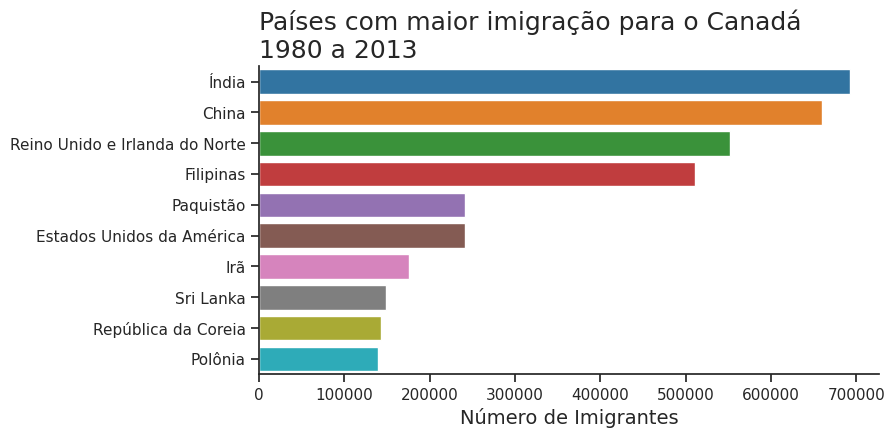

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
ax = sns.barplot(data=top_10, y=top_10.index, x='Total', orient='h', palette='tab10')

ax.set_title('Países com maior imigração para o Canadá\n1980 a 2013', loc='left', fontsize=18)
ax.set_xlabel('Número de Imigrantes', fontsize=14)
ax.set_ylabel('')
sns.despine()

plt.show()

##Criando o primeiro gráfico interativo

In [ ]:
import plotly.express as px

Essa Plotly express é uma interface de alto nível em que conseguimos criar gráficos interativos com poucas linhas de código. Vamos criar agora nosso prmeiro gráfico.

Lembra do gráfico referentes as tendências de imigração do Brasil? Criaremos um gráfico como esse, porém em uma versão interativa.

Para isso, criamos uma variável chamada fig, que receberá o px.line. Com a função line conseguimos criar um gráfico de linhas.

Em seguida, abrimos parênteses e colocamos as informações. Primeiro precisamos especificar qual é o dataframe que utilizaremos para criar esse gráfico.

O que continha somente os dados do Brasil era o dados_Brasil. Em seguida, colocamos a variável x. Nesse dataframe tinhamos o ano e o número de imigrantes.

Então, x='ano' e y='imigrantes', que era o nome da segunda coluna do dataframe. Na linha de baixo usaremos uma função para exibir esse gráfico. Então, escrevemos fig.show(). Em seguida, executamos a célula.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.show()

Agora, vamos melhorar esse gráfico. Repare que ele possui uma largura grande, podemos começar modificando seu tamanho. Para isso, abaixo da primeira linha de código, adicionamos a função fig.update_layout().

Para mudar a largura e a altura usaremos os parâmetros width=1000 e height=500. Em seguida, executamos a célula.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500)
fig.show()

Podemos rotacionar os marcadores do eixo X. Para isso, após o height=500 adicionamos vírgula e pulamos a linha. Nela, escrevemos xaxis={'tickangle': -45}, assim a rotação será -45º. Executamos o código para visualizar o gráfico.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500,
                  xaxis={'tickangle':-45})
fig.show()

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes')
fig.update_layout(width=1000, height=500,
                  xaxis={'tickangle':-45})
fig.show()

Adicionando título com Plotly
Para isso, na primeira função do código, acrescentamos vírgula e pulamos uma linha. Passamos o parâmetro title='Imigração do Brasil para o Canadá no período de 1980 a 2013'. Em seguida, executamos a célula para verificar se deu certo.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração dos Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(width=1000, height=500,
                  xaxis={'tickangle': -45})
fig.show()

Deu certo! Agora, vamos melhorar os rótulos dos eixos. Para ficar mais claro e organizado, escreveremos "Ano" com letra maiúscula e "Número de Imigrantes" ao invés de só "Imigrantes". Para isso, no fim da função update_layout(), adicionamos vírgula e pulamos para a linha de baixo.

Nela, escrevemos xaxis_title='Ano', o título do eixo X. Adicionamos outra vírgula e passamos o yaxis_title='Número de Imigrantes'.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

Agora temos novos títulos para os eixos x e y. Além disso, podemos realizar outras alterações, como na fonte. Lembrando que esse tipo de mudança sempre é feito no update_layout.

Então, abaixo do parâmetro xaxis_tickangle=-45, escrevemos font_family='Arial'. Adicionamos vírgula e pulamos uma linha. Para definir o tamanho da fonte escrevemos font_size=14.

Novamente adicionamos vírgula e na linha seguinte passamos font_color='grey' para mudar a cor da fonte.

É muito comum a utilização de fontes dos rótulos e ticks em uma cor mais clara para diminuir o contraste no gráfico.

Também podemos alterar no tamanho e cor da fonte do título. Para isso, escrevemos title_font_color='black' seguido de title_font_size=22. Assim o título terá um tamanho maior do que as outras fontes.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')
fig.show()

Alterando as cores com Plotly
Para isso, voltamos no código. Após a função px.line(), pulamos para a próxima linha de código e adicionamos fig.update_traces().

Entre os parênteses escrevemos line_color. É nesse trecho que conseguimos mudar a cor da linha.

Sendo assim, testaremos com o verde, assim como fizemos no gráfico estático. Escrevemos 'green'. Também podemos mudar a espessura da linha, para isso escrevemos line_width=4.

Em seguida, executamos o código para analisar como ficou.

In [ ]:
fig = px.line(dados_brasil, x='ano', y='imigrantes',
              title='Imigração do Brasil para o Canadá no período de 1980 a 2013')
fig.update_traces(line_color='green', line_width=4)
fig.update_layout(
    width=1000, height=500,
    xaxis={'tickangle': -45},
    font_family='Arial',
    font_size=14,
    font_color='grey',
    title_font_color='black',
    title_font_size=22,
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')
fig.show()

##Alterando cores com mais de uma variável

In [ ]:
america_sul

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Bolívia,América Latina e o Caribe,América do Sul,44,52,42,49,38,44,79,165,...,134,139,107,143,214,180,86,83,107,3205
Brasil,América Latina e o Caribe,América do Sul,211,220,192,139,145,130,205,244,...,969,1181,1746,2138,2509,2598,1508,1642,1714,29659
Chile,América Latina e o Caribe,América do Sul,1233,1069,1078,781,681,533,633,1454,...,384,427,530,350,375,340,174,291,273,21359
Colômbia,América Latina e o Caribe,América do Sul,266,326,360,244,235,214,257,376,...,6424,6535,5357,5452,4652,5218,4366,3741,3631,72088
Equador,América Latina e o Caribe,América do Sul,238,207,184,155,179,208,240,344,...,491,525,419,437,373,353,348,282,418,12233
Guiana,América Latina e o Caribe,América do Sul,2334,2943,3575,2650,1932,2299,3942,6174,...,1215,1286,1277,1137,1180,953,804,676,656,75785
Paraguai,América Latina e o Caribe,América do Sul,45,26,32,40,48,36,34,72,...,75,88,98,95,88,89,83,55,66,1944
Peru,América Latina e o Caribe,América do Sul,317,456,401,241,306,328,628,843,...,1653,1473,1490,1094,1884,1283,886,787,682,32652


Para conseguirmos fazer esse gráfico de linhas, precisamos de um dataframe que tenha somente a coluna com o país e os valores de cada ano. O restante podemos apagar.

Para isso, criaremos um dataframe chamaso df_america_sul_clean. Isso será igual a america_sul.drop(). Nos parênteses adicionamos colchetes e dentro deles passamos 'Continente'seguido de 'Região'e 'Total'.

Lembrando que a função drop serve para retirarmos colunas que não queremos visualizar.

Após os colchetes, adicionamos vírgula. Precisamos especificar que estamos nos referindo a colunas, sendo assim escrevemos o parâmetro axis=1.

Também precisamos fazer uma transposição no dataframe para deixarmos um ano em cada linha e em cada coluna um país. Na nossa tabela atual isso está ao contrário.

Para fazer isso, criaremos um dataframe chamado america_sul_final que será igual a df_america_sul_clean.T.

É o T que faz a transposição.

In [ ]:
df_america_sul_clean = america_sul.drop(['Continente', 'Região', 'Total'], axis=1)
america_sul_final = df_america_sul_clean.T
america_sul_final.head()

País,Argentina,Bolívia,Brasil,Chile,Colômbia,Equador,Guiana,Paraguai,Peru,Suriname,Uruguai,Venezuela
1980,368,44,211,1233,266,238,2334,45,317,15,128,103
1981,426,52,220,1069,326,207,2943,26,456,10,132,117
1982,626,42,192,1078,360,184,3575,32,401,21,146,174
1983,241,49,139,781,244,155,2650,40,241,12,105,124
1984,237,38,145,681,235,179,1932,48,306,5,90,142


É exatamente o que queríamos, uma linha para cada ano e uma coluna para cada país. Perfeito!

Agora vamos plotar um gráfico com tudo isso. Para isso, criamos fig = px.line(). Dentro dos parênteses passamos america_sul_final.

Em seguida, definiremos o eixo x. Ele será nosso index, pois nele teremos todos os anos. Então, para isso, na mesma linha adicionamos vírgula e escrevemos x=america_sul_final.index.

O eixo y serão as colunas, então escrevemos y=america_sul_final.columns. Em seguida, definimos que a cor será por país, então colos-'País'.

Com isso o Plotly irá definir cores diferentes para cada país.

Por fim, adicionaremos um título. Adicionamos vírgula e pulamos para a linha de baixo. Depois, escrevemos title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013').

Agora, podemos definir as configurações do layout. Para isso, pulamos duas linhas e escrevemos fig.update_layout(). Começaremos alterando a rotação dos ticks. Para isso, escrevemos xaxis={'tickangle': -45}.

Na linha seguinte, passamos o título do eixo x xaxis_title='Ano' seguido do eixo y yaxis_title='Número de imigrantes'.

Para exibir o gráfico, escrevemos fig.show().

In [ ]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País',
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

Adicionando marcadores
Além disso, também é possível adicionar marcadores nas linhas. Para isso, após o title, adicionamos vírgula e o parâmetro markers=True.

In [ ]:
fig = px.line(america_sul_final, x=america_sul_final.index, y=america_sul_final.columns, color='País', markers=True,
              title='Imigração dos países da América do Sul para o Canadá de 1980 a 2013')
fig.update_layout(
    xaxis={'tickangle': -45},
    xaxis_title='Ano',
    yaxis_title='Número de imigrantes')

fig.show()

##Salvando gráficos em HTML

Com a biblioteca Plotly, é possível salvar os gráficos em formato HTML e alguns outros formatos.

Essas opções são muito interessantes, principalmente se você tiver um público que não é técnico, nesse caso, não faz sentido mostrar um notebook cheio de códigos e sim o gráfico.

Existe uma forma de salvar o gráfico em HTML para ser aberto tanto no navegador ou até mesmo incorporado em uma página web.

Como usamos a variável fig no nosso código, para salvar digitamos fig.write_html(). Assim estamos escrevendo esse gráfico no formato HTML.

Nos parênteses, inserimos aspas simples abrir aspas e definimos o nome imigracao_america_sul.html. Feito isso, executamos o código.

In [ ]:
fig.write_html('imigracao_america_sul.html')

##Criando Gráfico com Animação

1 - A primeira etapa após obter o DataFrame apenas com os dados do Brasil, como fizemos no começo do curso, é mudar o tipo de dados da coluna que contém os anos para int ao invés de manter como strings:

2 - Depois disso, vamos criar um bloco de código onde vamos construir essa animação, importando plotly.graph_objs, um módulo da biblioteca Plotly que contém classes para criar visualizações de dados interativas e personalizadas.

3 - Em seguida, uma figura vazia é criada usando a função go.Figure() e atribuída à variável fig.

4 - A seguir, uma linha é adicionada ao gráfico usando a função fig.add_trace(). Nesta função, é passado um objeto Scatter, que recebe como argumentos os dados para os eixos X e Y do gráfico. Para que o gráfico seja exibido sem linha antes de clicar no botão play usamos o iloc[0] nas duas variáveis. Isso ocorre porque o iloc[0] seleciona o primeiro valor das colunas ano e imigrantes dos dados do Brasil, respectivamente. Ao adicionar esse ponto de dados à visualização do gráfico, ele será exibido inicialmente como um único ponto, sem linhas que o conectem a outros pontos.Além disso, passamos o modo de exibição lines, que quer dizer linhas e o nome da linha. Também é definida a espessura da linha usando o dicionário line=dict(width=4).

5 - Depois disso, o título do gráfico e as configurações do eixo X e Y são definidas usando a função fig.update_layout(). Os argumentos do título são:

text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>': define o texto do título como uma string formatada em negrito (usando as tags HTML "<b>" e "</b>")
x=0.12: define a posição horizontal do título no layout, em relação à largura da figura. O valor 0.12 especifica que o título começará a 12% da largura da figura.
xanchor='left': define o alinhamento horizontal do título. O valor 'left' significa que o título será alinhado à esquerda do layout.
font=dict(size=20): define o tamanho do texto do título.
Já Os argumentos para xaxis e yaxis são dicionários, com as seguintes propriedades:

range=[1980, 2013]: define o intervalo do eixo, ou seja, o menor e o maior valor que serão exibidos. Neste caso, o eixo x terá como menor valor 1980 e como maior valor 2013, enquanto o eixo y terá como menor valor 0 e como maior valor 3000.
autorange=False: define se os limites do eixo serão ajustados automaticamente (True) ou não (False). Neste caso, os limites não serão ajustados automaticamente.
title='<b>Ano</b>': define o título do eixo. Neste caso, o eixo x terá o título "Ano", que é formatado em negrito (usando as tags HTML "" e "").
title='<b>Número de imigrantes</b>': define o título do eixo. Neste caso, o eixo y terá o título "Número de imigrantes", que é formatado em negrito (usando as tags HTML "<b>" e "</b>").

6 - É adicionado um botão "Play" para a animação usando o argumento updatemenus. Esse argumento é uma lista que define as opções de menu para a figura. O valor atribuído a essa lista é um dicionário, com as seguintes propriedades:

type='buttons': define que o menu será composto por botões.
showactive=False: define que nenhum botão estará ativo inicialmente.
buttons=[dict(label='Play', method='animate', args=[None, {'frame': {'duration': 100, 'redraw': True}, 'fromcurrent': True}])]: define o botão que será exibido no menu. Este botão tem a etiqueta "Play" (ou seja, "tocar"), que é exibida no próprio botão. O método animate é usado para ativar a animação dos dados. O argumento args é uma lista que contém dois elementos: o primeiro elemento é None, indicando que nenhum trace (ou camada) do gráfico será afetado pela animação, e o segundo elemento é um dicionário que especifica os parâmetros da animação. O parâmetro frame define a duração de cada quadro da animação e a atualização de cada quadro. O parâmetro fromcurrent define se o quadro atual deve ser mantido ou se a animação deve ser iniciada do primeiro quadro.

7- A largura e a altura do gráfico são definidas com os parâmetros width e height, respectivamente:

8 - Em seguida, as configurações de animação são definidas. A variável frames é uma lista de objetos Frame do Plotly, que contém as informações dos dados para cada quadro da animação. Cada quadro é representado por um objeto Frame que contém um único trace, que é um objeto Scatter. No caso deste código, cada Scatter representa um ponto no gráfico, onde X é o ano e Y é o número de imigrantes.

O loop for é usado para criar um objeto Frame para cada ano no conjunto de dados, até o último ano. O método iloc é usado para selecionar os valores do DataFrame dados_brasil a partir do índice 0 até o índice atual i+1, o que significa que cada quadro da animação adiciona um ponto adicional ao gráfico. A cada iteração, a lista frames é preenchida com um novo objeto Frame.

Por último, a lista frames é atribuída à propriedade frames do objeto Figure (fig) criado anteriormente. Isso permite que a animação seja exibida no gráfico quando o botão de controle de animação é pressionado. Cada frame contém os dados do gráfico para um determinado ano e é exibido em sequência quando o botão "Play" é clicado.

9 - Por fim, a função fig.show() é chamada para exibir o gráfico animado no notebook. Quando o botão "Play" é pressionado, o gráfico será animado, mostrando a imigração do Brasil para o Canadá no período de 1980 a 2013.

Temos o código completo abaixo:

In [ ]:
import plotly.graph_objs as go

# Criando uma figura
fig = go.Figure()

# Adicionando a linha do gráfico e definindo a espessura da linha
fig.add_trace(
    go.Scatter(x=[dados_brasil['ano'].iloc[0]], y=[dados_brasil['imigrantes'].iloc[0]], mode='lines', name='Imigrantes', line=dict(width=4))
)

# Definindo as configurações de layout
fig.update_layout(
    title=dict(
        text='<b>Imigração do Brasil para o Canadá no período de 1980 a 2013</b>',
        x=0.12,
        xanchor='left',
        font=dict(size=20)
    ),
    xaxis=dict(range=[1980, 2013], autorange=False, title='<b>Ano</b>'),
    yaxis=dict(range=[0, 3000], autorange=False, title='<b>Número de imigrantes</b>'),
    updatemenus=[dict(
        type='buttons',
        showactive=False,
        buttons=[dict(
            label='Play',
            method='animate',
            args=[None, {'frame': {'duration': 500, 'redraw': True}, 'fromcurrent': True}]
        )]
    )],
    width=1000,
    height=500
)

# Definir as configurações de animação
frames = [go.Frame(data=[go.Scatter(x=dados_brasil['ano'].iloc[:i+1], y=dados_brasil['imigrantes'].iloc[:i+1])]) for i in range(len(dados_brasil))]
fig.frames = frames

# Mostrando a figura
fig.show()